# Project Team ID : PTID-CDS-DEC-23-1729
# Batch : Aug 28 - CDS & 3rd July-CDS 

# Project :PRCP-1006-HomeLoanDef

## Problem Statement: 


## Task

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-Create a predictive model to identify the factors / customer segments that are eligible for taking loan.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option("display.max_columns",None)


In [3]:
data = pd.read_csv("application_train.csv")
data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## Domain Analysis

**SK_ID_CURR:**

    Unique identifier for each applicant.
    Significance: Primary key used for referencing and linking with other tables.
**TARGET:**

    Binary indicator of loan default (1) or not (0).
    Significance: This is the target variable for your predictive model. Understanding the distribution is crucial for assessing model performance.
**NAME_CONTRACT_TYPE:**

    Type of loan (e.g., cash loans, revolving loans).
    Significance: Helps in categorizing the nature of the loan, which can impact repayment behavior.
**CODE_GENDER:**

    Gender of the applicant (M/F).
    Significance: Gender can influence income, expenses, and overall financial behavior.
**FLAG_OWN_CAR:**

    Indicates if the applicant owns a car (Y/N).
    Significance: Car ownership can provide insights into the applicant's financial stability.
**FLAG_OWN_REALTY:**

    Indicates if the applicant owns real estate (Y/N).
    Significance: Real estate ownership can be an indicator of stability and financial standing.
**CNT_CHILDREN:**

    Number of children the applicant has.
    Significance: Family size can affect financial decisions and responsibilities.
**AMT_INCOME_TOTAL:**

    Total income of the applicant.
    Significance: Primary indicator of the applicant's financial capacity to repay the loan.
**AMT_CREDIT:**

    Total credit amount of the loan.
    Significance: Represents the loan amount sought by the applicant.
**AMT_ANNUITY:**

    Loan annuity (fixed installment).
    Significance: Monthly payment, crucial for assessing the applicant's ability to make regular payments.
**AMT_GOODS_PRICE:**

    Price of the goods for which the loan is given.
    Significance: Relevant when the loan is specific to a purchase (e.g., home loan).
**NAME_TYPE_SUITE:**

    Individuals accompanying the applicant.
    Significance: May provide insights into the applicant's social and familial connections.
**NAME_INCOME_TYPE:**

    Type of income received (e.g., working, maternity leave).
    Significance: Different income types can indicate stability and ability to repay.
**NAME_EDUCATION_TYPE:**

    Level of education of the applicant.
    Significance: Education level can impact earning potential and financial behavior.
**NAME_FAMILY_STATUS:**

    Family status of the applicant.
    Significance: Family structure can influence financial decisions and responsibilities.
**NAME_HOUSING_TYPE:**

    Housing situation of the applicant.
    Significance: Living arrangements can provide insights into the applicant's stability.
**REGION_POPULATION_RELATIVE:**

    Normalized population of the region where the applicant lives.
    Significance: Regional factors may impact economic conditions and, consequently, repayment capabilities.
**DAYS_BIRTH:**

    Age of the applicant in days (negative value).
    Significance: Age can influence financial decisions and stability.
**DAYS_EMPLOYED:**

    Number of days the applicant has been employed (negative value).
    Significance: Employment history can indicate stability and financial capacity.
**DAYS_REGISTRATION:**

    Number of days since the applicant's registration.
    Significance: Duration since registration may provide insights into the applicant's stability.
**DAYS_ID_PUBLISH:**

    Number of days since the applicant's ID was published.
    Significance: Duration since ID publication may be relevant to stability and trustworthiness.
**OWN_CAR_AGE:**

    Age of the applicant's car.
    Significance: Car age can provide insights into the applicant's financial choices.
**FLAG_MOBIL:**

    Indicates if the applicant provided a mobile phone (1) or not (0).
    Significance: Mobile phone ownership is a basic indicator of connectivity.
**FLAG_EMP_PHONE:**

    Indicates if the applicant provided a work phone (1) or not (0).
    Significance: Work phone ownership can indicate employment stability.
**FLAG_WORK_PHONE:**

    Indicates if the applicant provided a phone for work (1) or not (0).
    Significance: Work phone ownership can further indicate employment stability.
**FLAG_CONT_MOBILE:**

    Indicates if the mobile phone can be contacted (1) or not (0).
    Significance: Contactability is crucial for communication and follow-ups.
**FLAG_PHONE:**

    Indicates if the applicant provided a home phone (1) or not (0).
    Significance: Home phone ownership may be relevant for communication purposes.
**FLAG_EMAIL:**

    Indicates if the applicant provided an email (1) or not (0).
    Significance: Email communication is common for official correspondence.
**OCCUPATION_TYPE:**

    Occupation of the applicant.
    Significance: Occupation can provide insights into income and stability.
**CNT_FAM_MEMBERS:**

    Number of family members.
    Significance: Family size can affect financial decisions and responsibilities.
**REGION_RATING_CLIENT:**

    Home Credit rating of the region where the client lives.
    Significance: Regional credit rating may affect the applicant's creditworthiness.
**REGION_RATING_CLIENT_W_CITY:**

    Home Credit rating of the region with the city where the client lives.
    Significance: Combined regional and city credit rating for a more detailed assessment.
**WEEKDAY_APPR_PROCESS_START:**

    Day of the week when the application process started.
    Significance: Timing of application may have implications for processing and approval.
**HOUR_APPR_PROCESS_START:**

    Hour of the day when the application process started.
    Significance: Timing of application can be relevant for workflow and processing.
**REG_REGION_NOT_LIVE_REGION:**

    Flag indicating if the client's permanent address does not match the contact address at the regional level (1) or not (0).
    Significance: Address consistency may have implications for the applicant's stability.
**REG_REGION_NOT_WORK_REGION:**

    Flag indicating if the client's permanent address does not match the work address at the regional level (1) or not (0).
    Significance: Address consistency may have implications for the applicant's stability.
**LIVE_REGION_NOT_WORK_REGION:**

    Flag indicating if the client's contact address does not match the work address at the regional level (1) or not (0).
    Significance: Address consistency may have implications for the applicant's stability.
**REG_CITY_NOT_LIVE_CITY:**

    Flag indicating if the client's permanent address does not match the contact address at the city level (1) or not (0).
    Significance: Address consistency may have implications for the applicant's stability.
**REG_CITY_NOT_WORK_CITY:**

    Flag indicating if the client's permanent address does not match the work address at the city level (1) or not (0).
    Significance: Address consistency may have implications for the applicant's stability.
**LIVE_CITY_NOT_WORK_CITY:**

    Flag indicating if the client's contact address does not match the work address at the city level (1) or not (0).
    Significance: Address consistency may have implications for the applicant's stability.
**ORGANIZATION_TYPE:**

    Type of organization where the client works.
    Significance: Nature of employment can provide insights into income and stability.
**EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3:**

    Normalized scores from external data sources.
    Significance: These external scores can be used for assessing the applicant's creditworthiness from alternative sources.
    
**APARTMENTS_AVG, BASEMENTAREA_AVG, YEARS_BEGINEXPLUATATION_AVG, YEARS_BUILD_AVG, COMMONAREA_AVG, ELEVATORS_AVG, ENTRANCES_AVG, FLOORSMAX_AVG, FLOORSMIN_AVG, LANDAREA_AVG, LIVINGAPARTMENTS_AVG, LIVINGAREA_AVG, NONLIVINGAPARTMENTS_AVG, NONLIVINGAREA_AVG:**

    Average values for various property-related metrics.
    Significance: These metrics provide insights into the average characteristics of the applicant's living space.

**APARTMENTS_MODE, BASEMENTAREA_MODE, YEARS_BEGINEXPLUATATION_MODE, YEARS_BUILD_MODE, COMMONAREA_MODE, ELEVATORS_MODE, ENTRANCES_MODE, FLOORSMAX_MODE, FLOORSMIN_MODE, LANDAREA_MODE:**

    Modus (most frequent) values for various property-related metrics.
    Significance: The modus values represent the most common characteristics of the applicant's living space.

## Basic Checks

In [4]:
data.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
data.shape

(307511, 122)

In [6]:
data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [7]:
data.info(pd.set_option("display.max_columns",None))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [8]:
data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

### Insights
**There is no constant column  and corrupt data is present in the dataset.**

In [9]:
data.describe(pd.set_option("display.max_rows",None)).T


,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,1.000020e+05,189145.500000,278202.000000,367142.500000,4.562550e+05
TARGET,307511.0,0.080729,0.272419,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.000000e+00,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-2.522900e+04,-19682.000000,-15750.000000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-1.791200e+04,-2760.000000,-1213.000000,-289.000000,3.652430e+05


## Insights
There are no constant columns.

DAYS_BIRTH and DAYS_EMPLOYED both have values in negative and days can't be negative so we need to convert this.

There are some columns in which the margine between 75th percentile and the maximum value is quite high there is a high chance of getting outliers from here.

In [10]:
data["DAYS_BIRTH"] = data["DAYS_BIRTH"]/-365
data.loc[data["DAYS_EMPLOYED"]<0,"DAYS_EMPLOYED"]= data["DAYS_EMPLOYED"]/-365
data.loc[data["DAYS_EMPLOYED"]>=0,"DAYS_EMPLOYED"] = data["DAYS_EMPLOYED"]/365
data["DAYS_REGISTRATION"] = data["DAYS_REGISTRATION"]/-365
data["DAYS_ID_PUBLISH"] = data["DAYS_ID_PUBLISH"]/-365

In [11]:
data = data.rename(columns={"DAYS_BIRTH":"YEARS_BIRTH","DAYS_EMPLOYED":"YEARS_EMPLOYED","DAYS_REGISTRATION":"YEARS_REGISTRATION","DAYS_ID_PUBLISH":"YEARS_ID_PUBLISH"})

In [12]:
for i in data:
    print(i,"---- ",data[i].dtype,"----- ",data[i].isnull().sum())

SK_ID_CURR ----  int64 -----  0
TARGET ----  int64 -----  0
NAME_CONTRACT_TYPE ----  object -----  0
CODE_GENDER ----  object -----  0
FLAG_OWN_CAR ----  object -----  0
FLAG_OWN_REALTY ----  object -----  0
CNT_CHILDREN ----  int64 -----  0
AMT_INCOME_TOTAL ----  float64 -----  0
AMT_CREDIT ----  float64 -----  0
AMT_ANNUITY ----  float64 -----  12
AMT_GOODS_PRICE ----  float64 -----  278
NAME_TYPE_SUITE ----  object -----  1292
NAME_INCOME_TYPE ----  object -----  0
NAME_EDUCATION_TYPE ----  object -----  0
NAME_FAMILY_STATUS ----  object -----  0
NAME_HOUSING_TYPE ----  object -----  0
REGION_POPULATION_RELATIVE ----  float64 -----  0
YEARS_BIRTH ----  float64 -----  0
YEARS_EMPLOYED ----  float64 -----  0
YEARS_REGISTRATION ----  float64 -----  0
YEARS_ID_PUBLISH ----  float64 -----  0
OWN_CAR_AGE ----  float64 -----  202929
FLAG_MOBIL ----  int64 -----  0
FLAG_EMP_PHONE ----  int64 -----  0
FLAG_WORK_PHONE ----  int64 -----  0
FLAG_CONT_MOBILE ----  int64 -----  0
FLAG_PHONE ---- 

## insights 
There are some null values in some of the columns which we have to handle.

In [13]:
data.duplicated().sum()

0

# EDA

In [14]:
obj_col = data.select_dtypes(include="object").columns.to_list()
num_col = data.select_dtypes(exclude="object").columns.to_list()

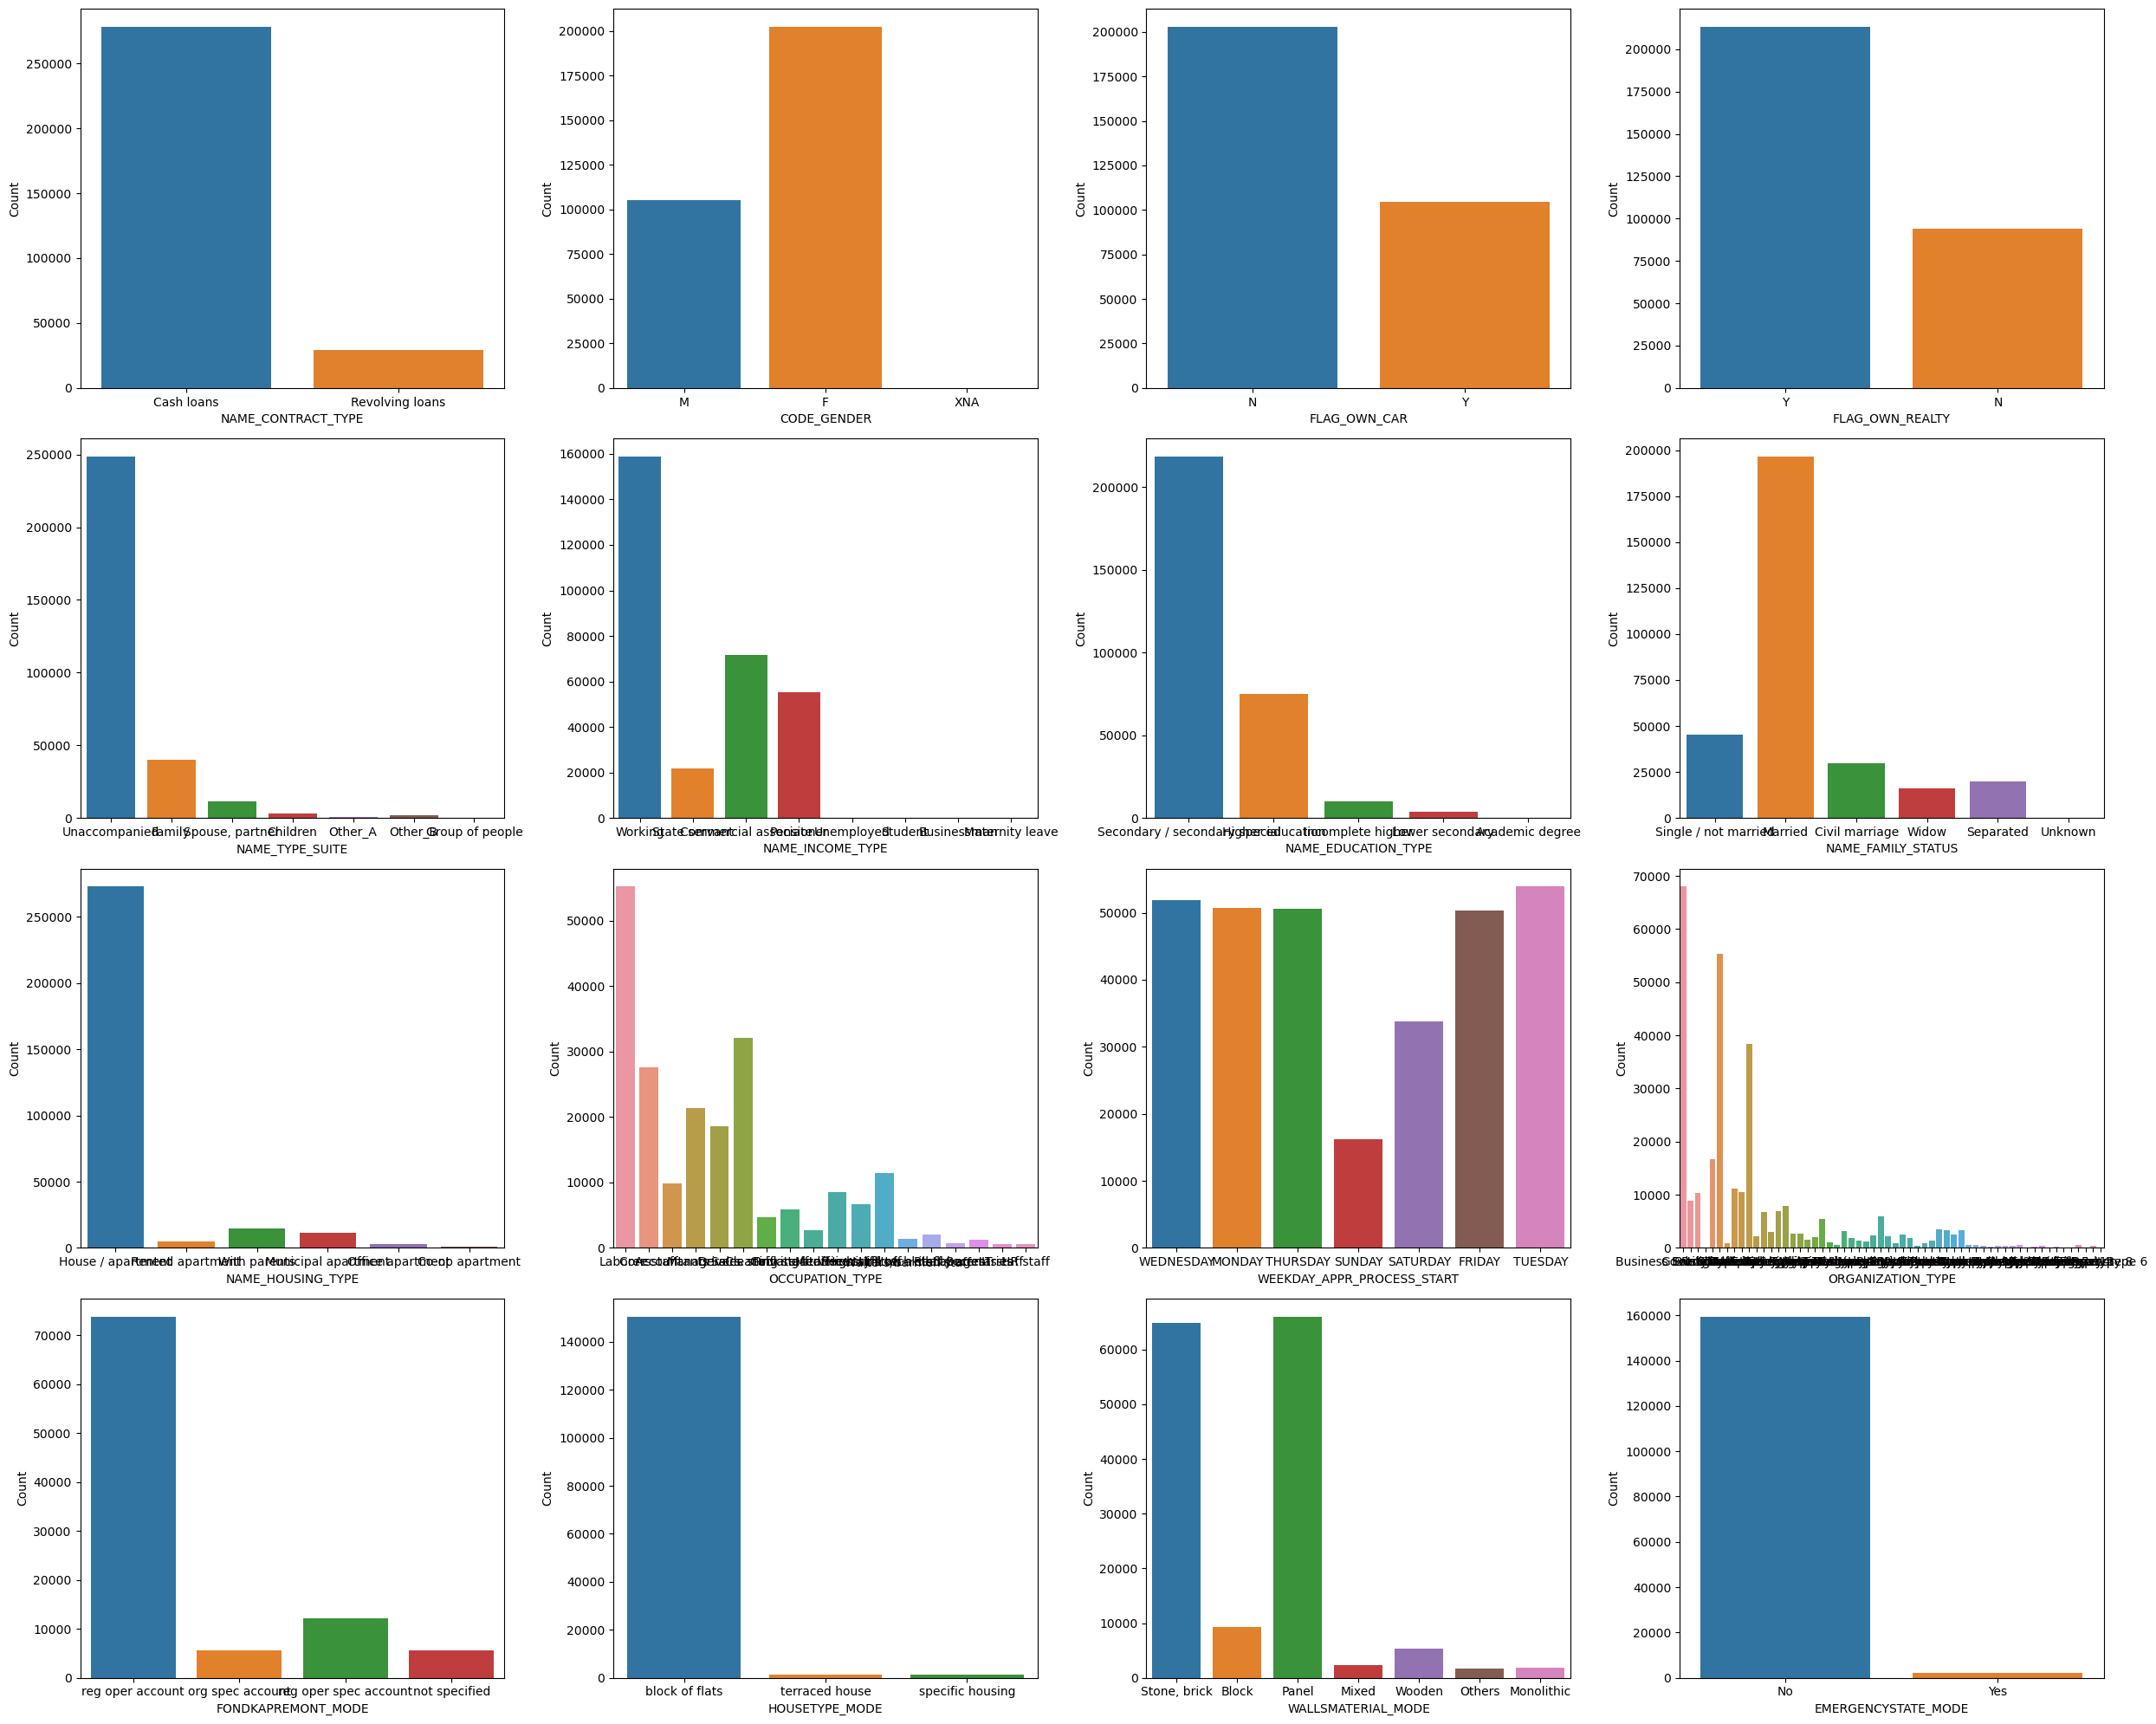

In [16]:
plt.figure(figsize=(25,20))
plotnumber=1

for i in obj_col:
    plt.subplot(4,4,plotnumber)
    sns.countplot(x=data[i])
    plt.xlabel(i)
    plt.ylabel("Count")
    plotnumber+=1
plt.tight_layout()
plt.show()

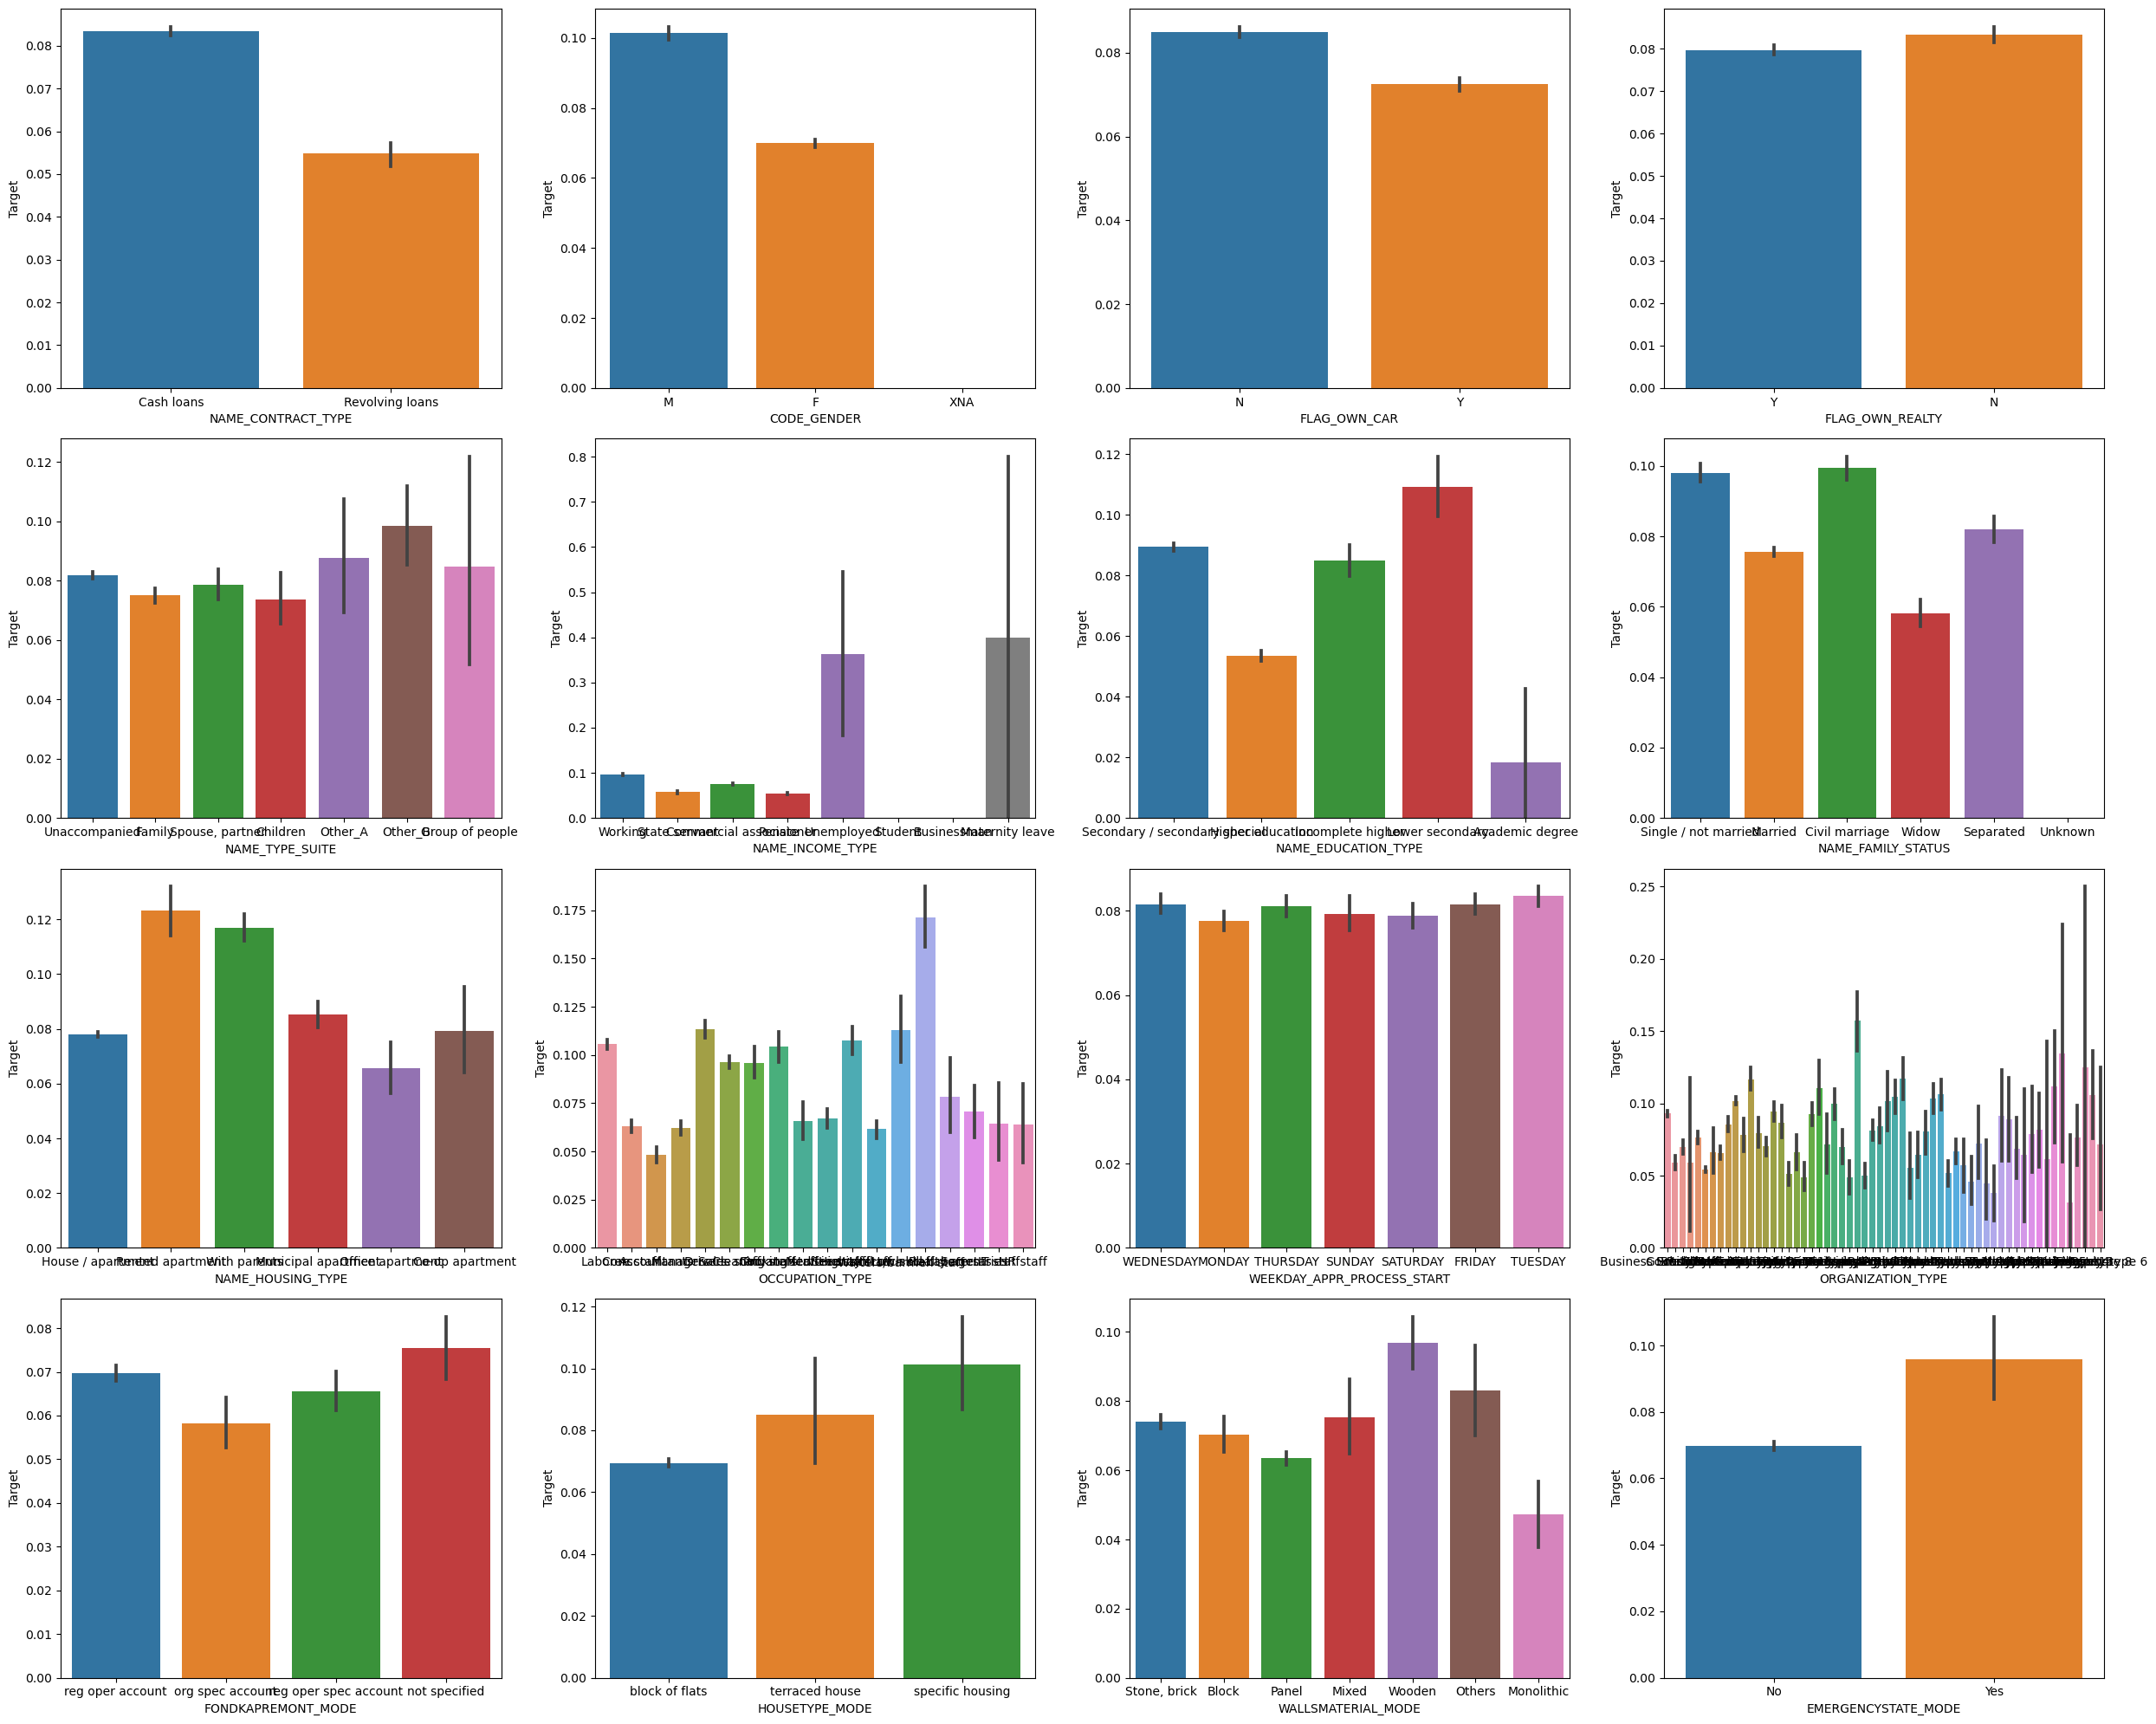

In [17]:
plt.figure(figsize=(25,20))
plotnumber=1

for i in obj_col:
    plt.subplot(4,4,plotnumber)
    sns.barplot(x=data[i],y=data["TARGET"])
    plt.xlabel(i)
    plt.ylabel("Target")
    plotnumber+=1
plt.tight_layout()
plt.show()

### Insights from Univariate analysis of object columns
**NAME_CONTRACT_TYPE:**
    
    The nature of the loan i.e Cash loans has dominated over Revolving loans with a count of above 25000 where as the Revolving loans has a count of below 30000.
**CODE_GENDER:**
    Females are more with a count of arround 200000 and male are less with count of arround 110000.
**FLAG_OWN_CAR:**
      
      The persons who don't have car are more in our data with a count of approx 200000 as compaired to the persons who own car with a count of approx 105000.
**FLAG_OWN_REALTY:**
    
    Presons who own real estate are more in our data with count of approx 215000 as compaired to the presons who don'town real estate with a coount of very less approx 95000.
**NAME_TYPE_SUITE:**
   
       Unaccompanied: The applicant applied for the loan alone are at top with a count of approx 250000, followed by Family: The applicant applied with family members with a count of approx 40000, Spouse, partner: The applicant applied with their spouse or partner which is of count 11370 . The least applicants are who applied with a Group of people having a count of 271.
**NAME_INCOME_TYPE:**
    
    Working persons are more in our data with a count of 158774.Commercial associate are the next highest with aount of 71617 followed by Pensioner and State servant. The least is Maternity leave with a count of 5.
**NAME_EDUCATION_TYPE:**
    
    Persons with Secondary / secondary special education are the most in our data with a count of 218391 next to it is persons with Higher education having a count of 74863 followed by otheres. The least is the persons with Academic degree with a count of 164.
**NAME_FAMILY_STATUS:**
    
    Married people are maximum in our data with a count of arround 200000, followed by single with a count of arround 46000 and so on . The least that present in our data is Unkown with a count of 2.
**NAME_HOUSING_TYPE:**
    
    The persons who have there won house or live in an appartment are the most in our data with count of 272868 second to it in the queeue are the persons who are living with their parents with a count of 14840 and so on. The least that in our data is the persons who live in co-op apertment with a count of 1122.
**OCCUPATION_TYPE:**

    Laborers are dominating in the data set with a count of 55186 next to it is sales staff with a count of 32102, core staff is next with a count of 27570 followed by others . IT staff is the least with a count of 526.
**WEEKDAY_APPR_PROCESS_START:**

    In this column Tuesday most of the application process has started and the coount of this is approx 55000 next to it is wednesday with a count of 51934 followed by others. The day in which the application processes sstarted with a count of approx 16181.
**ORGANIZATION_TYPE:**

    Business Entity Type 3 has the max count of 67992 followed by XNA with a count of 55374 next to it is self_employed with a count of 38412 and so on . The least count 24 which is represented by Industry: type 8.
**FONDKAPREMONT_MODE:**

    Reg oper account is the most frequently occuring among all of them with a count of 73830 followed by reg oper spec account with a count of 12080 and so on. The least occuring among them is org spec account with a count of 5619.
**HOUSETYPE_MODE:**

    Block of flats is the highest occruing among all with a count of 150503 followed by specific housing with a count of 1499 and the least one is terraced house with a count of 1212.
**WALLSMATERIAL_MODE:**

    Panel is the most frequent in coourance with a count of approx 66000 followed by Stone, brick with a count of approx 65000 and so on. The least is Others with a count of 1625.
**EMERGENCYSTATE_MODE:**

    IN EMERGENCYSTATE_MODE 'No' is dominating with a count of approx 160000 and the least is yes with a count of 2300.

In [18]:
# for numeric data

### Insights
None of the columns are normally distributed.

### Data Preprocessing

In [15]:
# Handeling null values
data.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
YEARS_BIRTH                          0
YEARS_EMPLOYED                       0
YEARS_REGISTRATION                   0
YEARS_ID_PUBLISH                     0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

### Insight
There are some columns having null values in our data set.

In [16]:
for i in data.columns:
    if data[i].dtype == 'int64':
        data.loc[data[i].isnull()==True,i] = data[i].median()
    elif data[i].dtype == 'float64':
        data.loc[data[i].isnull()==True,i] = data[i].median()
    elif data[i].dtype == 'object':
        a= data[i].mode()
        b=a[0]
        data.loc[data[i].isnull()==True,i] =b

In [18]:
data.isnull().sum(pd.set_option("display.max_column",None))

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                     0
AMT_GOODS_PRICE                 0
NAME_TYPE_SUITE                 0
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
YEARS_BIRTH                     0
YEARS_EMPLOYED                  0
YEARS_REGISTRATION              0
YEARS_ID_PUBLISH                0
OWN_CAR_AGE                     0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
OCCUPATION_TYPE                 0
CNT_FAM_MEMBER

### Converting categorical column in to numerical
  **Label Encoding**

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in obj_col:
    data[i] = le.fit_transform(data[i])

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(68), int32(16), int64(38)
memory usage: 267.5 MB


## Handeling Outliers

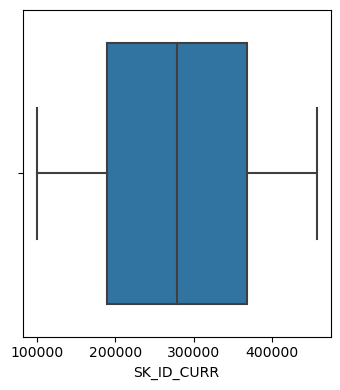

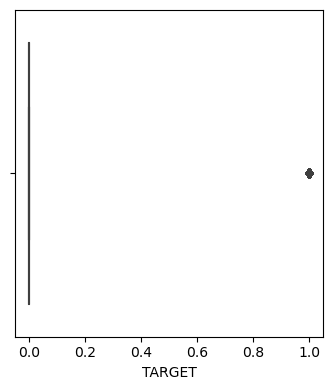

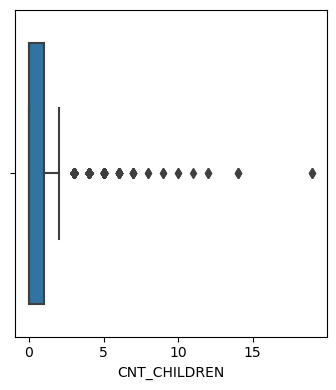

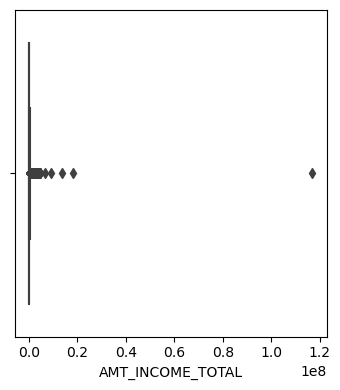

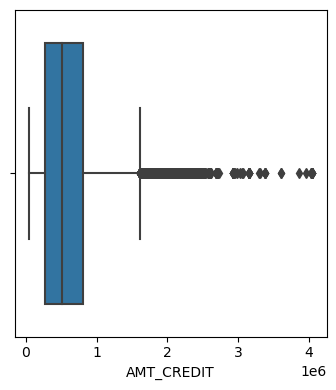

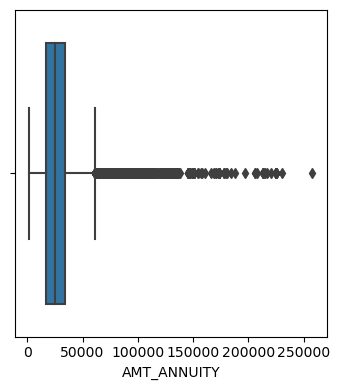

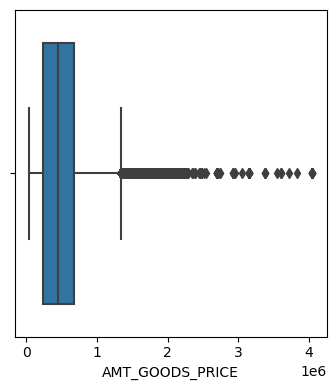

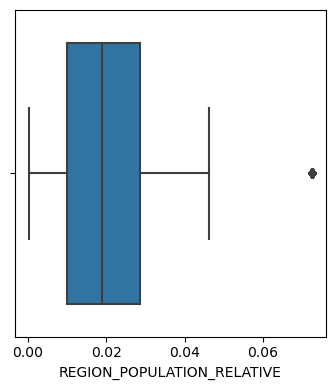

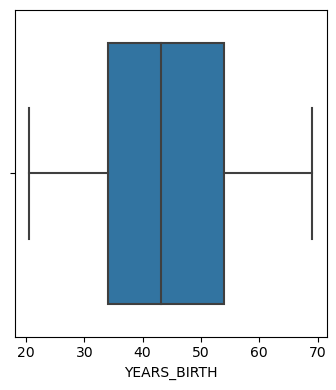

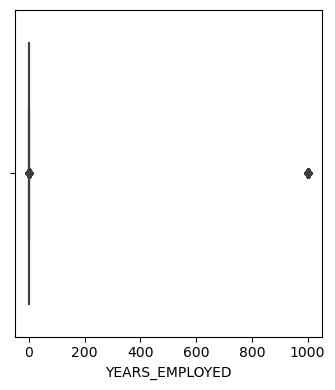

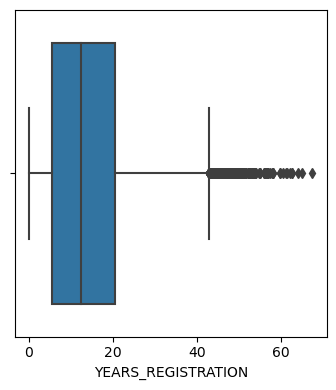

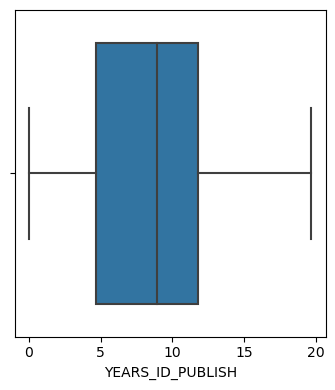

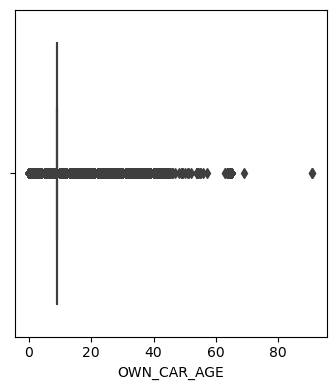

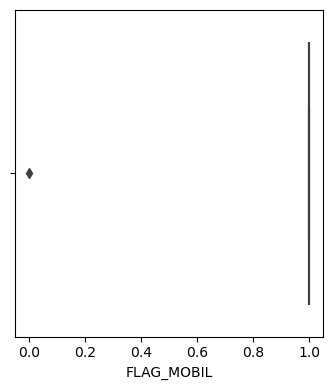

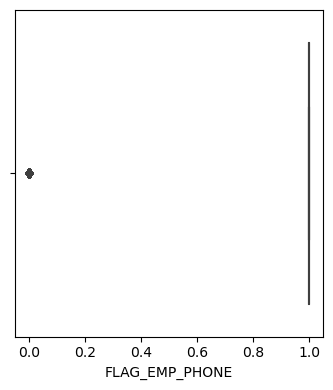

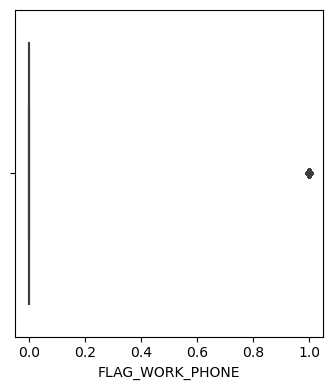

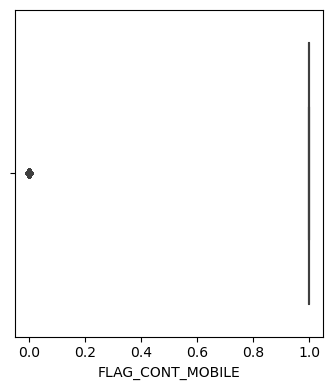

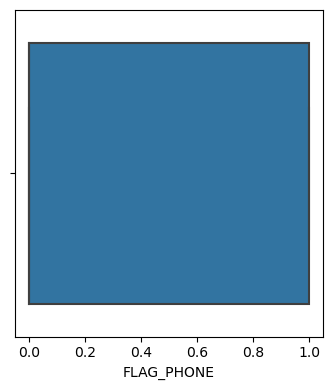

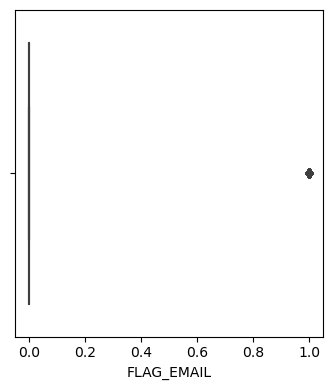

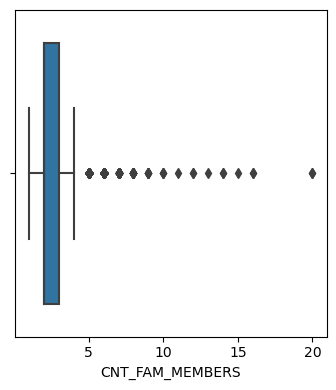

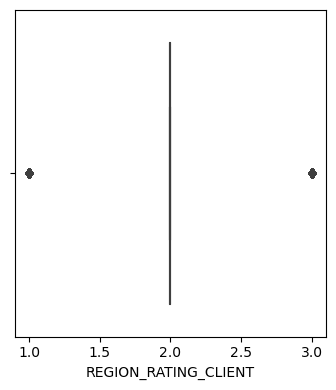

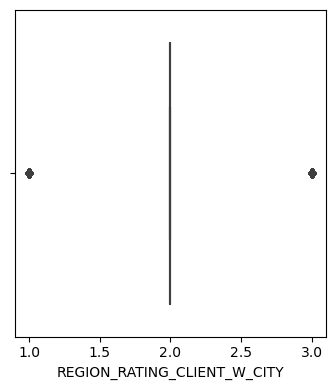

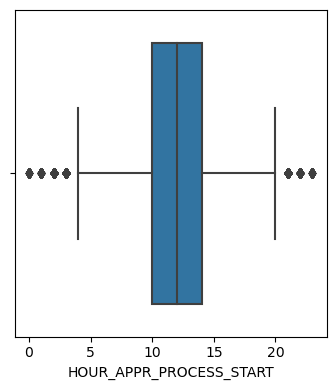

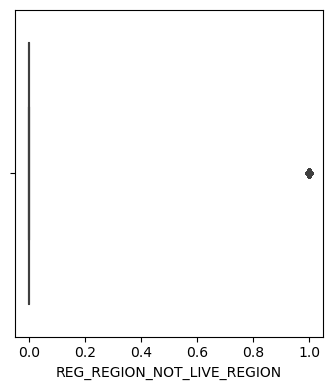

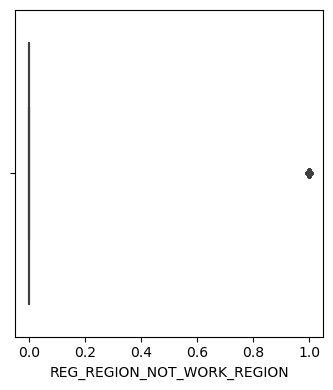

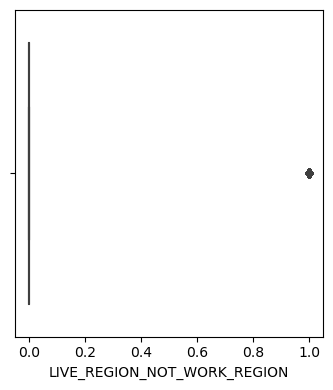

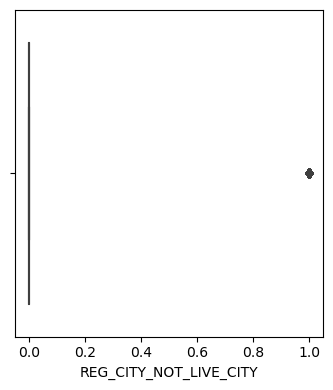

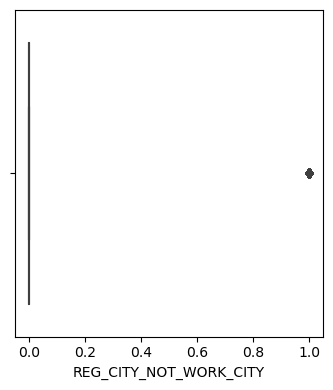

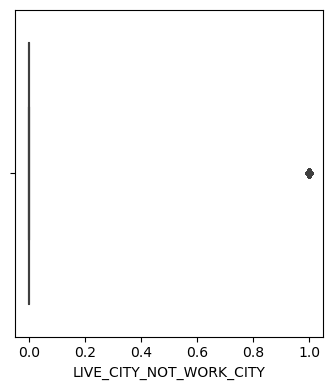

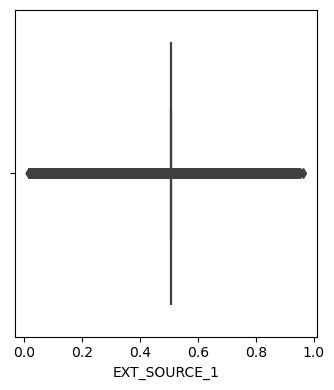

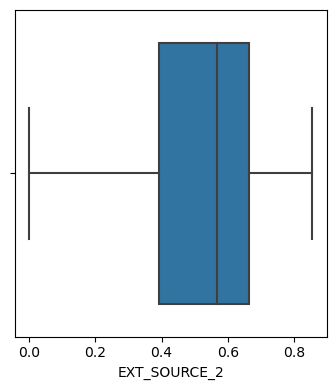

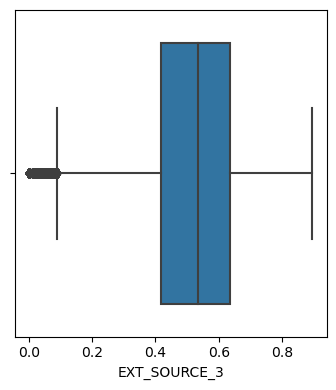

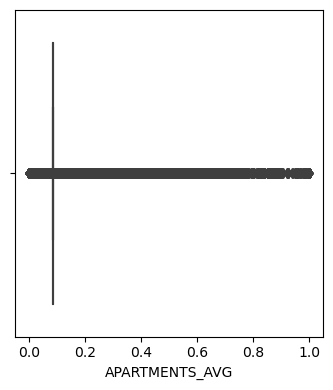

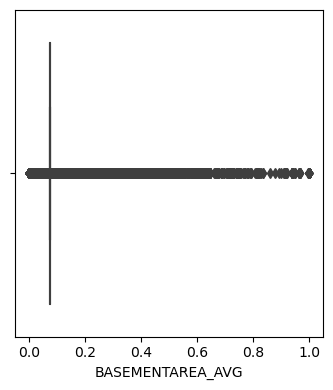

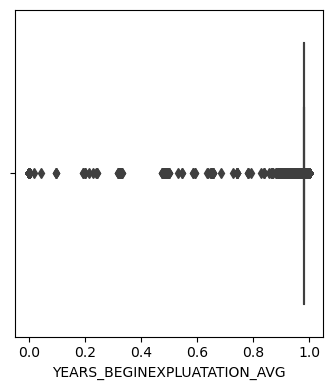

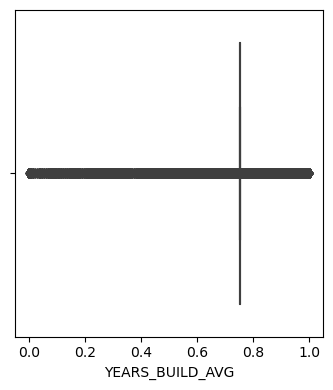

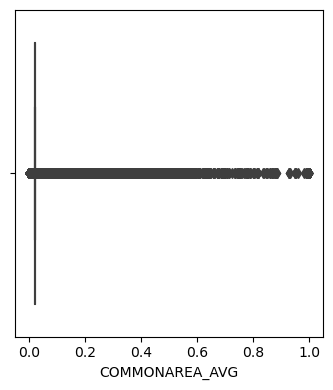

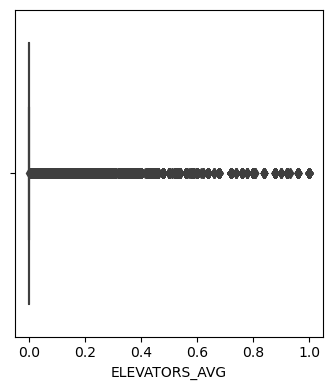

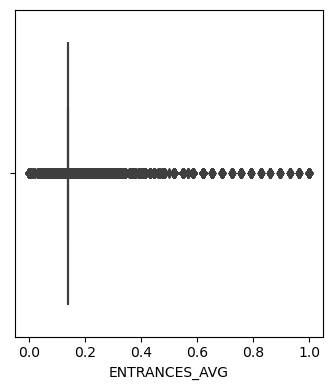

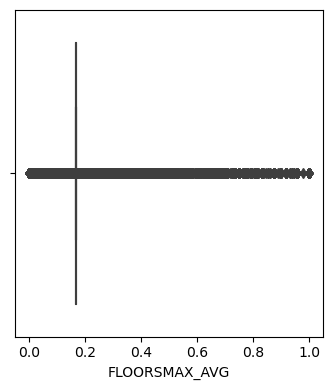

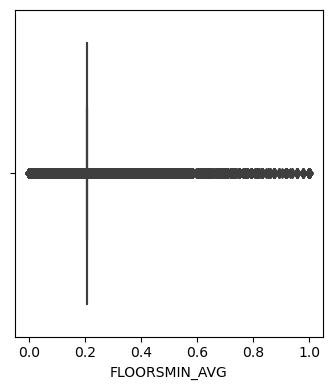

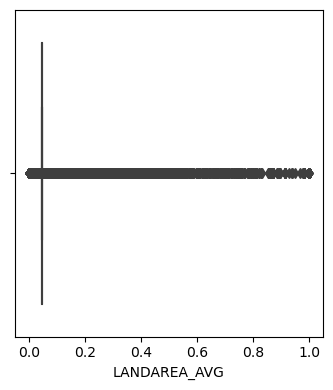

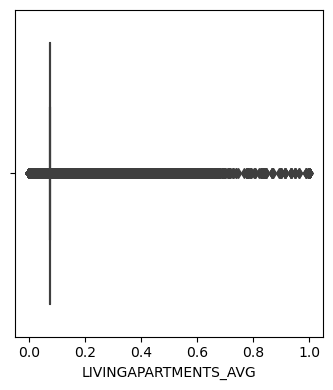

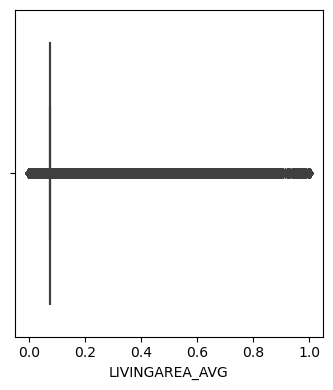

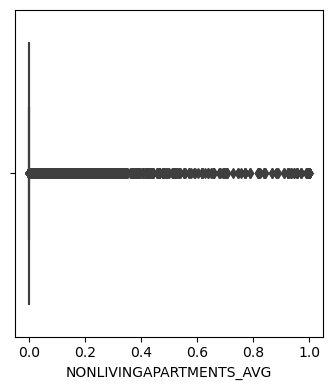

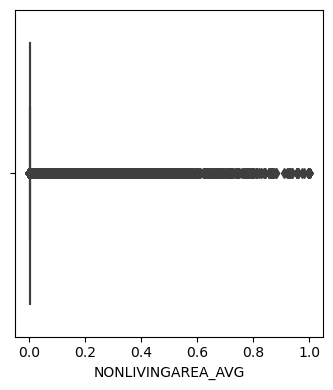

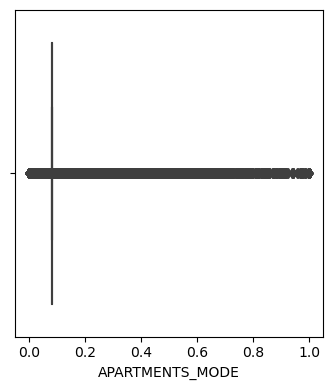

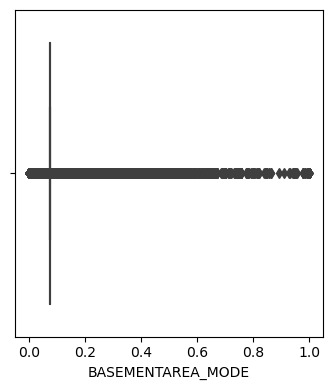

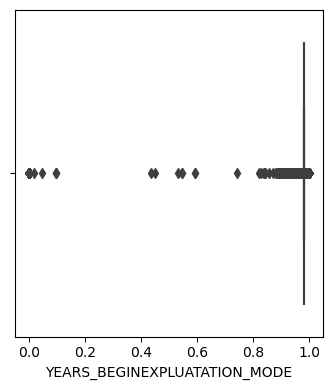

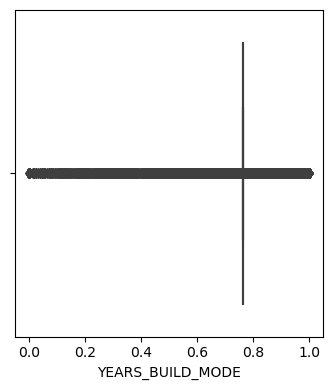

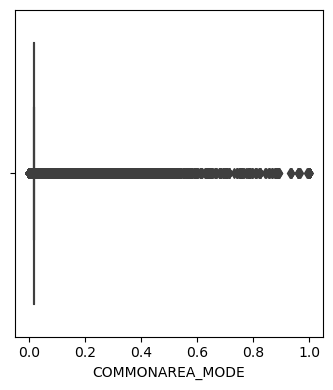

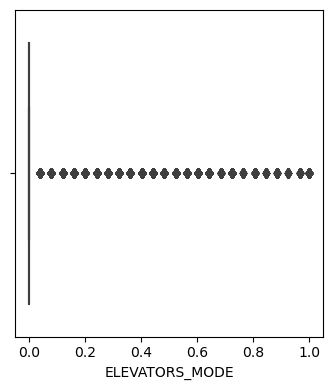

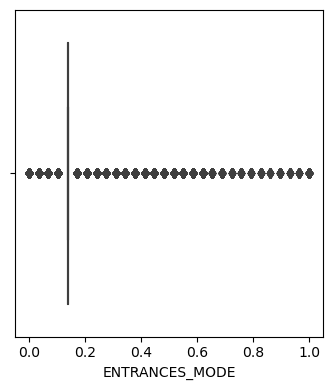

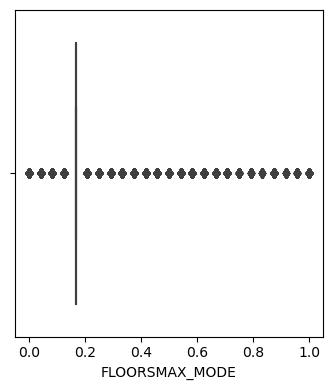

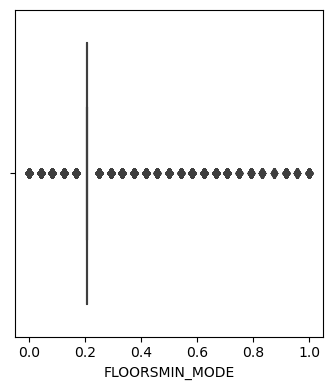

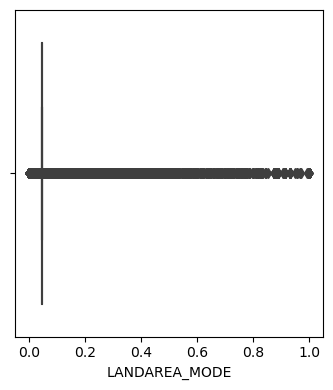

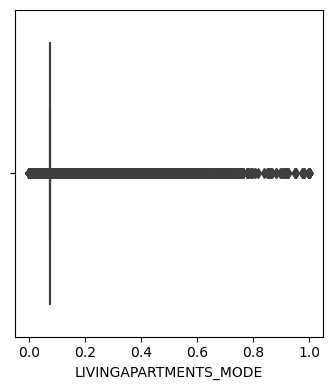

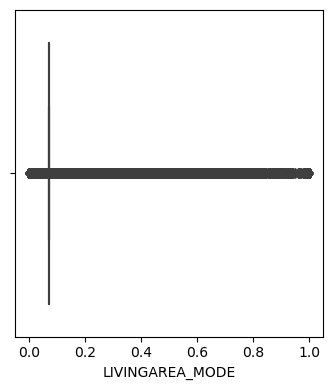

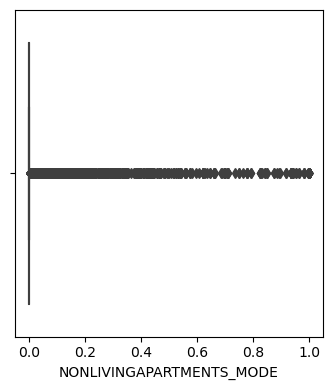

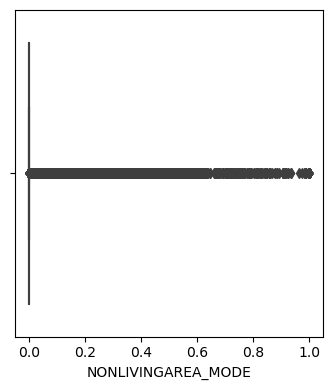

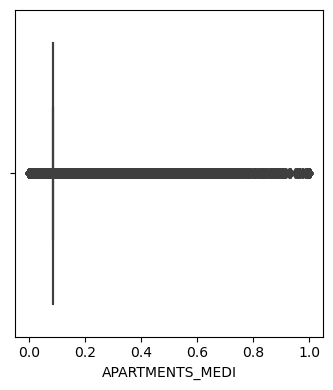

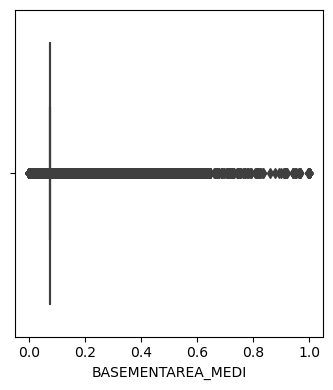

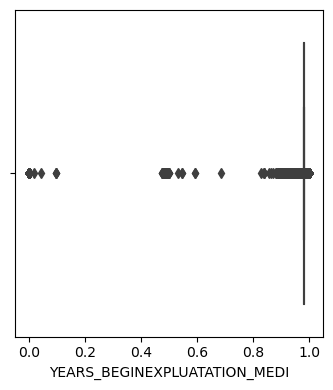

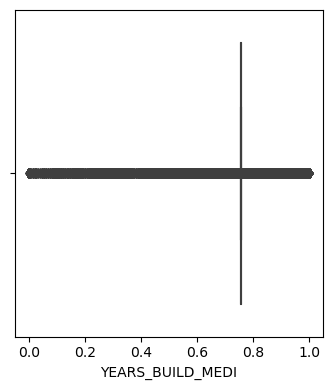

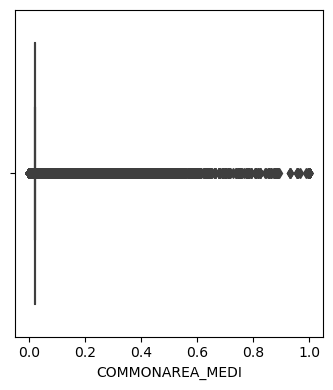

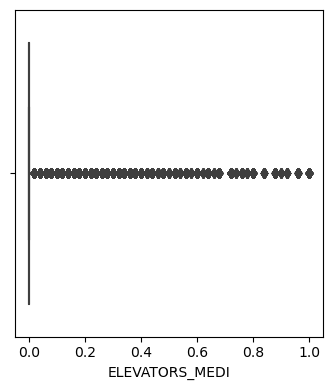

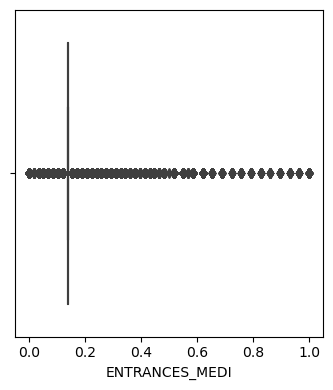

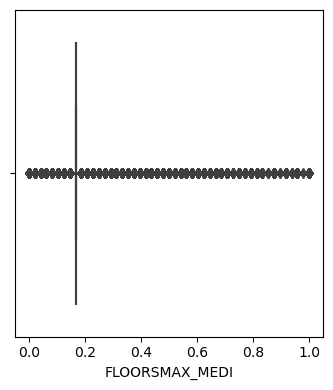

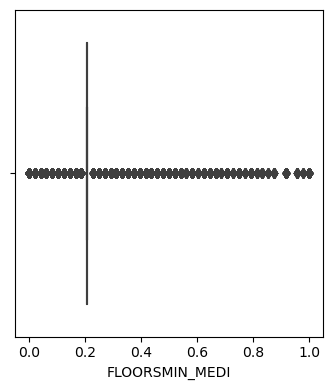

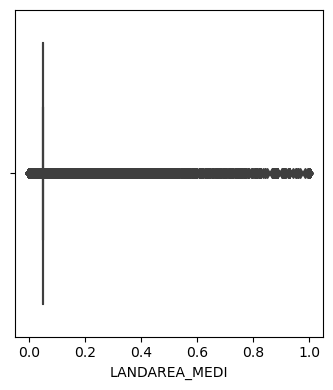

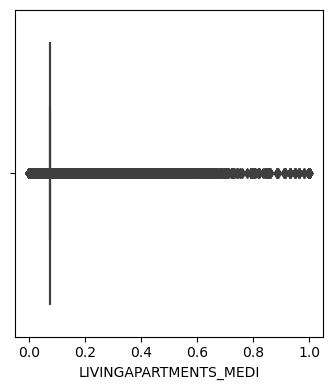

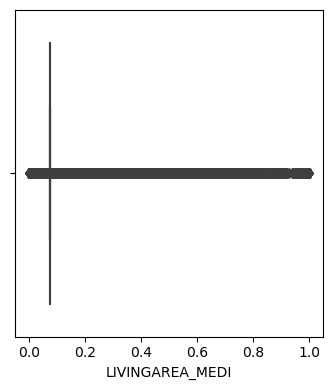

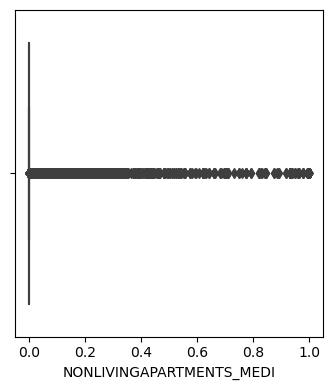

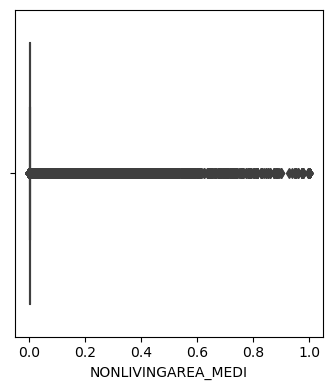

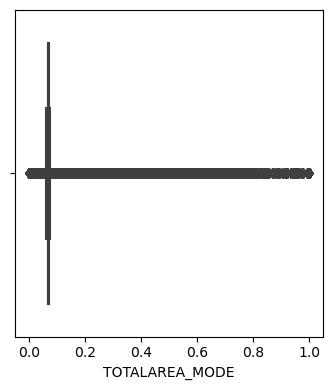

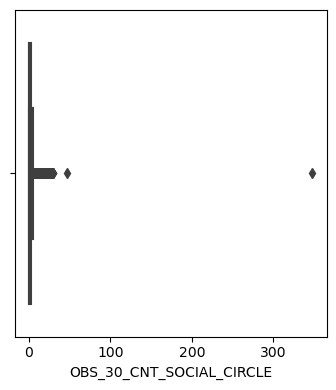

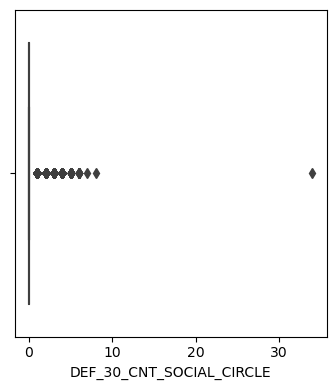

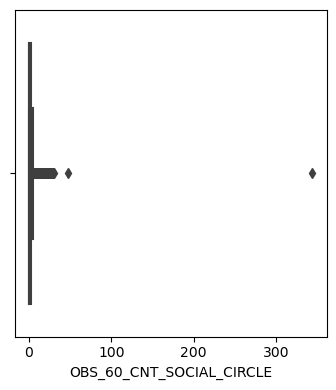

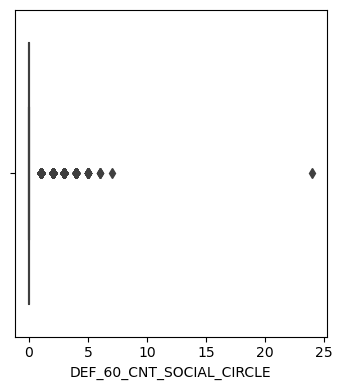

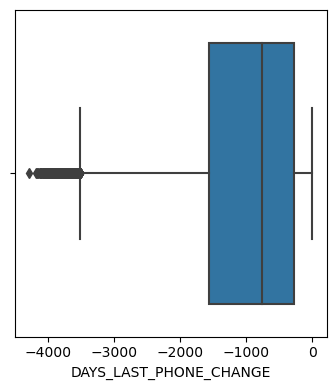

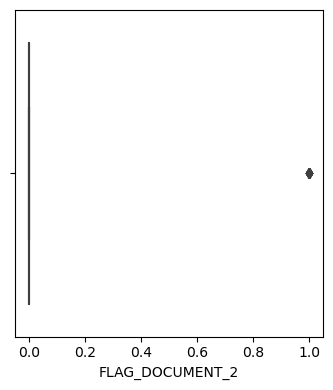

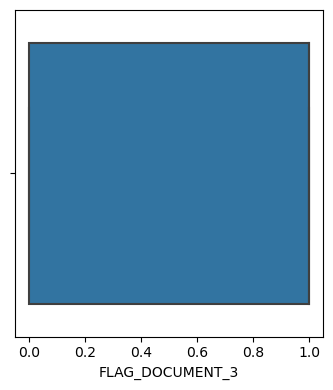

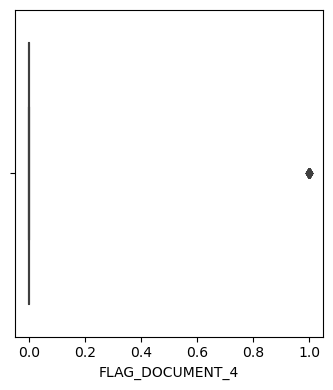

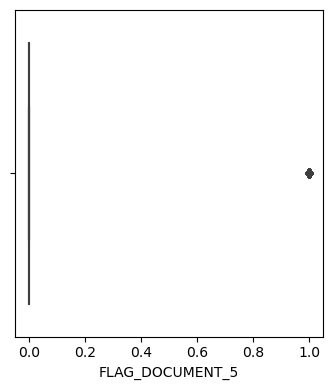

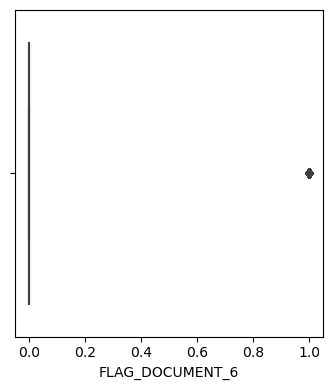

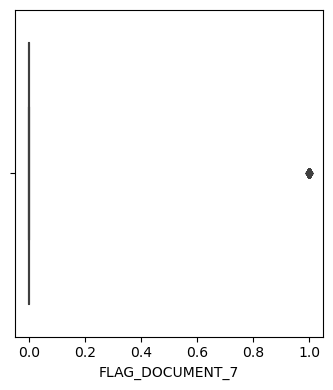

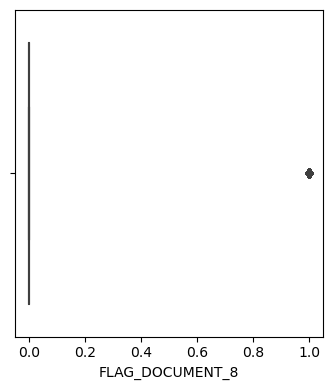

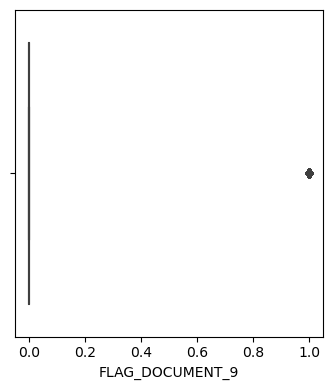

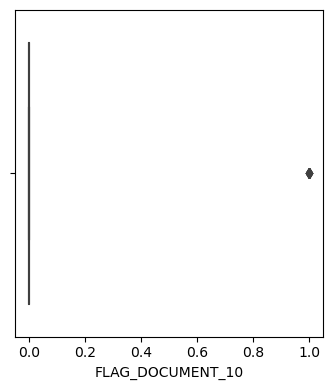

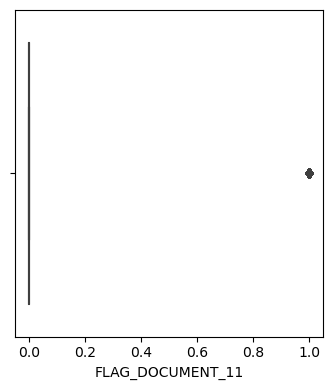

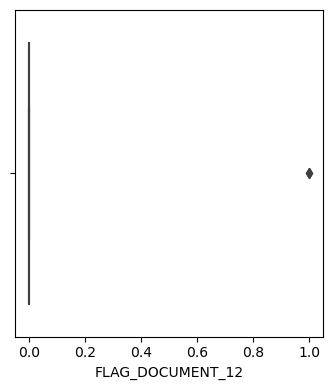

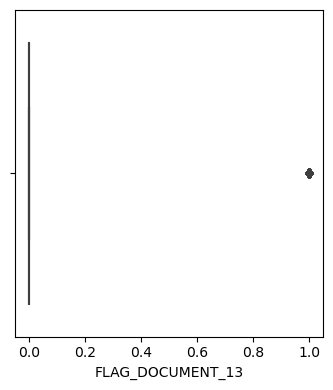

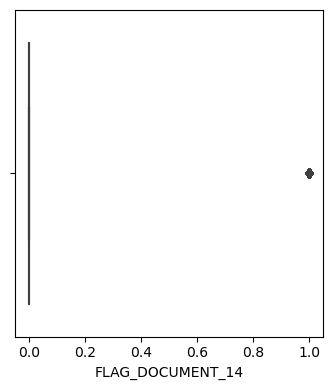

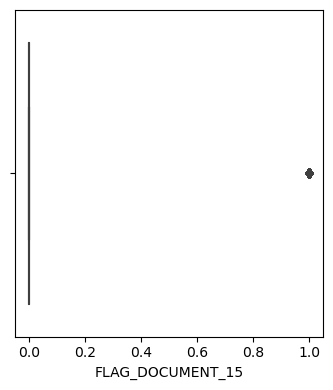

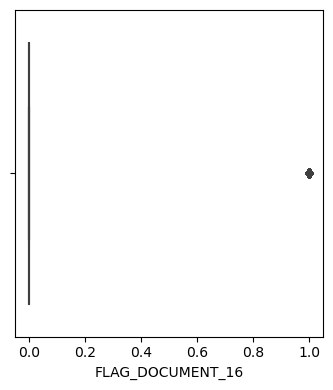

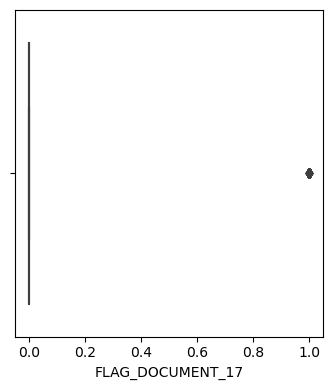

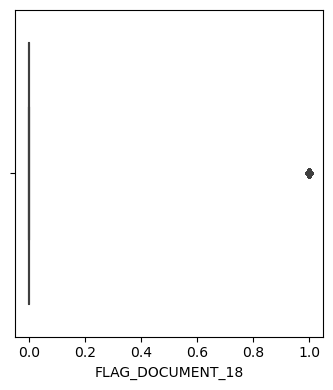

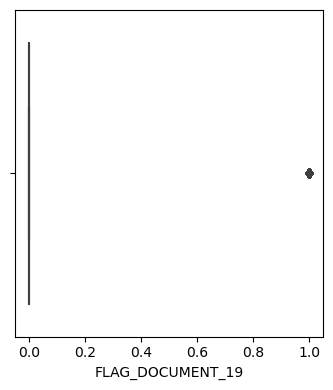

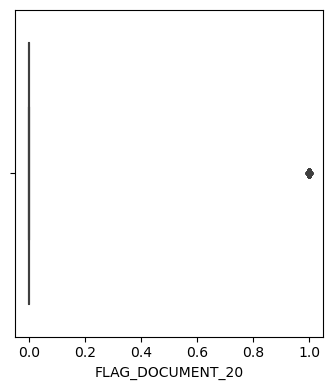

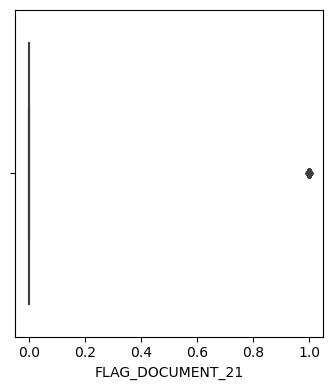

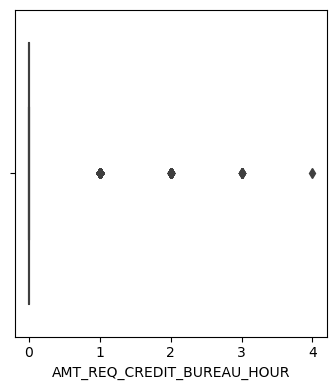

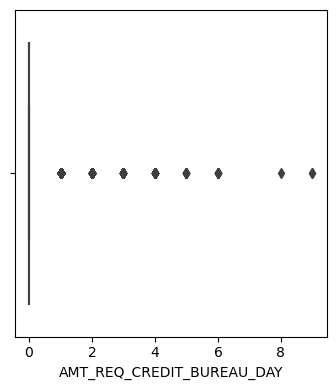

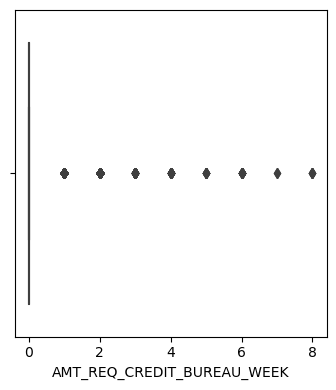

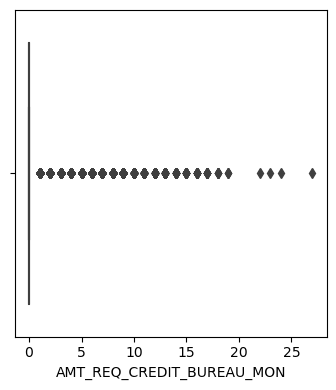

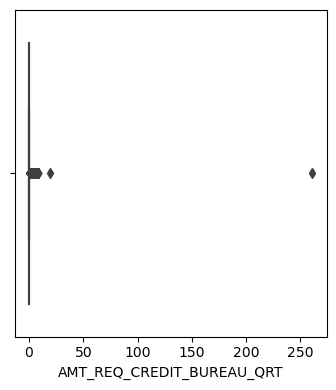

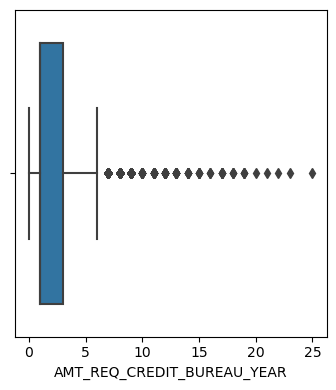

In [26]:
for i in num_col:
    plt.figure(figsize=(10,4))
    plt.subplot(131)
    sns.boxplot(x=data[i])
    plt.xlabel(i)
    plt.tight_layout()
    plt.show()

## Insights
There are some columns in which we have outliers which we need to handel.

In [21]:
q1 = data['CNT_CHILDREN'].quantile(0.25)
q3 = data['CNT_CHILDREN'].quantile(0.75)
iqr = q3-q1
ul = q3 + 1.5*iqr
ll = q1 - 1.5*iqr
data.loc[data['CNT_CHILDREN']>ul,'CNT_CHILDREN'] = data['CNT_CHILDREN'].median()
data.loc[data['CNT_CHILDREN']<ll,'CNT_CHILDREN'] = data['CNT_CHILDREN'].median()

In [22]:
q1 = data['CNT_FAM_MEMBERS'].quantile(0.25)
q3 = data['CNT_FAM_MEMBERS'].quantile(0.75)
iqr = q3-q1
ul = q3 + 1.5*iqr
ll = q1 - 1.5*iqr
data.loc[data['CNT_FAM_MEMBERS']>ul,'CNT_FAM_MEMBERS'] = data['CNT_FAM_MEMBERS'].median()
data.loc[data['CNT_FAM_MEMBERS']<ll,'CNT_FAM_MEMBERS'] = data['CNT_FAM_MEMBERS'].median()

In [23]:
q1 = data['HOUR_APPR_PROCESS_START'].quantile(0.25)
q3 = data['HOUR_APPR_PROCESS_START'].quantile(0.75)
iqr = q3-q1
ul = q3 + 1.5*iqr
ll = q1 - 1.5*iqr
data.loc[data['HOUR_APPR_PROCESS_START']>ul,'HOUR_APPR_PROCESS_START'] = data['HOUR_APPR_PROCESS_START'].median()
data.loc[data['HOUR_APPR_PROCESS_START']<ll,'HOUR_APPR_PROCESS_START'] = data['HOUR_APPR_PROCESS_START'].median()

In [24]:
q1 = data['AMT_REQ_CREDIT_BUREAU_YEAR'].quantile(0.25)
q3 = data['AMT_REQ_CREDIT_BUREAU_YEAR'].quantile(0.75)
iqr = q3-q1
ul = q3 + 1.5*iqr
ll = q1 - 1.5*iqr
data.loc[data['AMT_REQ_CREDIT_BUREAU_YEAR']>ul,'AMT_REQ_CREDIT_BUREAU_YEAR'] = data['AMT_REQ_CREDIT_BUREAU_YEAR'].median()


In [25]:
data['ELEVATORS_AVG'].dtypes

dtype('float64')

In [26]:
data.loc[data['AMT_INCOME_TOTAL']>0.2,'AMT_INCOME_TOTAL'] = data['AMT_INCOME_TOTAL'].median()
data.loc[data['AMT_CREDIT']>2.7,'AMT_CREDIT'] = data['AMT_CREDIT'].median()
data.loc[data['AMT_ANNUITY']>150000,'AMT_ANNUITY'] = data['AMT_ANNUITY'].median()
data.loc[data['AMT_GOODS_PRICE']>2.6,'AMT_GOODS_PRICE'] = data['AMT_GOODS_PRICE'].median()
data.loc[data['REGION_POPULATION_RELATIVE']>0.06,'REGION_POPULATION_RELATIVE'] = data['REGION_POPULATION_RELATIVE'].median()
data.loc[data['YEARS_REGISTRATION']>60,'YEARS_REGISTRATION'] = data['YEARS_REGISTRATION'].median()
data.loc[data['OWN_CAR_AGE']>60,'OWN_CAR_AGE'] = data['OWN_CAR_AGE'].median()
data.loc[data['YEARS_BEGINEXPLUATATION_AVG']<0.8,'YEARS_BEGINEXPLUATATION_AVG'] = data['YEARS_BEGINEXPLUATATION_AVG'].median()
data.loc[data['COMMONAREA_AVG']>0.85,'COMMONAREA_AVG'] = data['COMMONAREA_AVG'].median()
data.loc[data['ELEVATORS_AVG']>0.7,'ELEVATORS_AVG'] = data['ELEVATORS_AVG'].median()
data.loc[data['ENTRANCES_AVG']>0.7,'ENTRANCES_AVG'] = data['ENTRANCES_AVG'].median()
data.loc[data['YEARS_BEGINEXPLUATATION_MEDI']<0.8,'YEARS_BEGINEXPLUATATION_MEDI'] = data['YEARS_BEGINEXPLUATATION_MEDI'].median()
data.loc[data['YEARS_BEGINEXPLUATATION_MODE']<0.8,'YEARS_BEGINEXPLUATATION_MODE'] = data['YEARS_BEGINEXPLUATATION_MODE'].median()
data.loc[data['ENTRANCES_AVG']>0.7,'ENTRANCES_AVG'] = data['ENTRANCES_AVG'].median()
data.loc[data['COMMONAREA_MODE']>0.8,'COMMONAREA_MODE'] = data['COMMONAREA_MODE'].median()
data.loc[data['COMMONAREA_MEDI']>0.8,'COMMONAREA_MEDI'] = data['COMMONAREA_MEDI'].median()
data.loc[data['ELEVATORS_MEDI']>0.7,'ELEVATORS_MEDI'] = data['ELEVATORS_MEDI'].median()
data.loc[data['FLOORSMIN_MEDI']>0.8,'FLOORSMIN_MEDI'] = data['FLOORSMIN_MEDI'].median()
data.loc[data['FLOORSMIN_MEDI']>0.8,'FLOORSMIN_MEDI'] = data['FLOORSMIN_MEDI'].median()
data.loc[data['OBS_30_CNT_SOCIAL_CIRCLE']>40,'OBS_30_CNT_SOCIAL_CIRCLE'] = data['OBS_30_CNT_SOCIAL_CIRCLE'].median()
data.loc[data['DEF_30_CNT_SOCIAL_CIRCLE']>10,'DEF_30_CNT_SOCIAL_CIRCLE'] = data['DEF_30_CNT_SOCIAL_CIRCLE'].median()
data.loc[data['OBS_60_CNT_SOCIAL_CIRCLE']>45,'OBS_60_CNT_SOCIAL_CIRCLE'] = data['OBS_60_CNT_SOCIAL_CIRCLE'].median()
data.loc[data['DEF_60_CNT_SOCIAL_CIRCLE']>10,'DEF_60_CNT_SOCIAL_CIRCLE'] = data['DEF_60_CNT_SOCIAL_CIRCLE'].median()
data.loc[data['AMT_REQ_CREDIT_BUREAU_MON']>20,'AMT_REQ_CREDIT_BUREAU_MON'] = data['AMT_REQ_CREDIT_BUREAU_MON'].median()
data.loc[data['AMT_REQ_CREDIT_BUREAU_QRT']>40,'AMT_REQ_CREDIT_BUREAU_QRT'] = data['AMT_REQ_CREDIT_BUREAU_QRT'].median()


In [27]:
outlier_col = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','YEARS_REGISTRATION',
              'OWN_CAR_AGE','YEARS_BEGINEXPLUATATION_AVG','COMMONAREA_AVG','ELEVATORS_AVG','ENTRANCES_AVG','YEARS_BEGINEXPLUATATION_MEDI',
              'YEARS_BEGINEXPLUATATION_MODE','ENTRANCES_AVG','COMMONAREA_MODE','COMMONAREA_MEDI','ELEVATORS_MEDI','FLOORSMIN_MEDI',
              'FLOORSMIN_MEDI','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE',
              'DEF_60_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR',
              'HOUR_APPR_PROCESS_START','CNT_FAM_MEMBERS','CNT_CHILDREN']

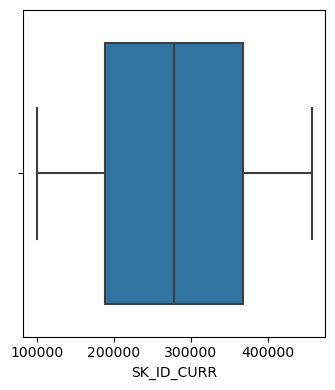

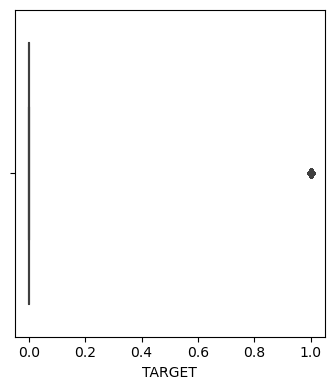

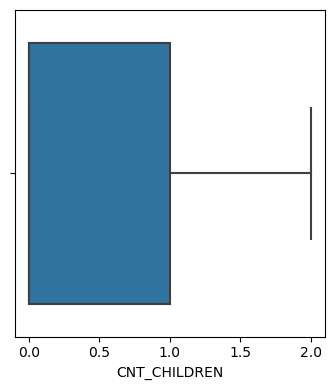

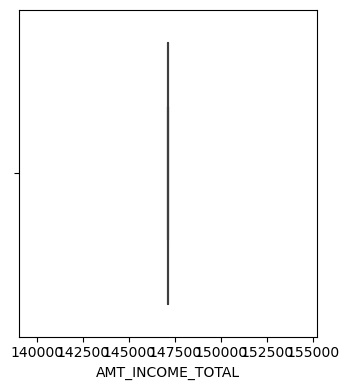

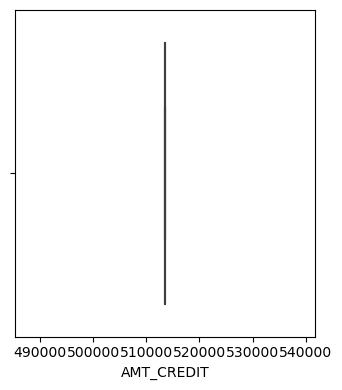

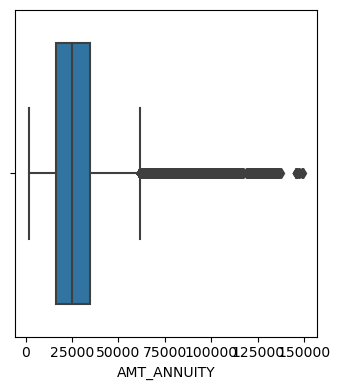

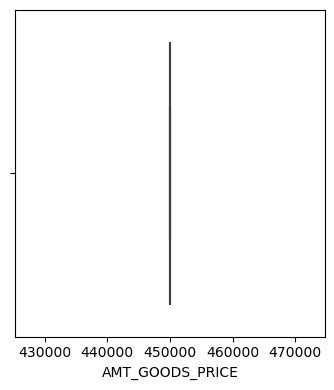

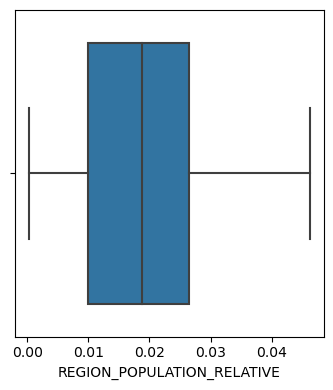

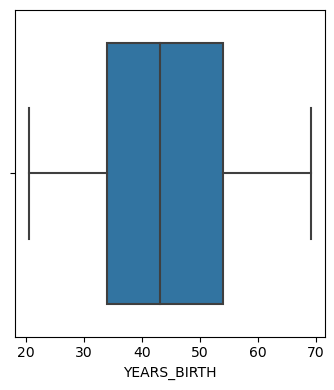

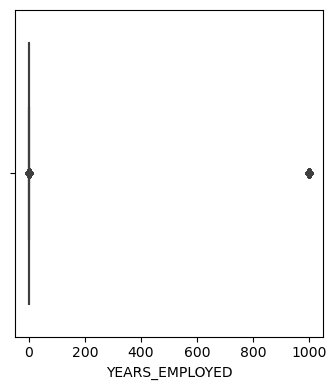

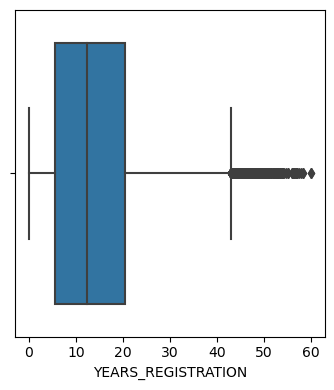

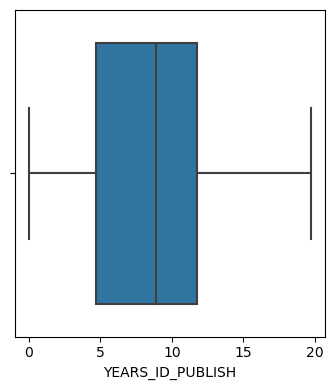

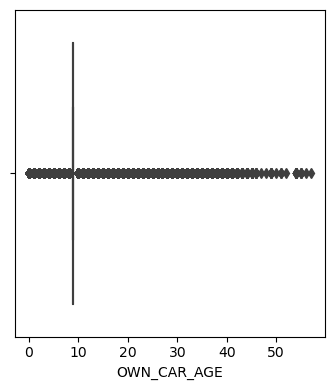

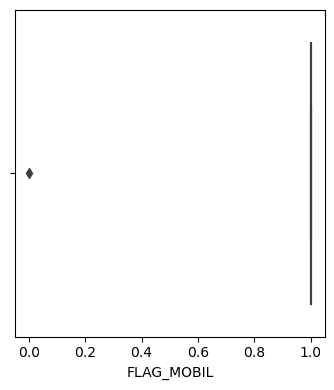

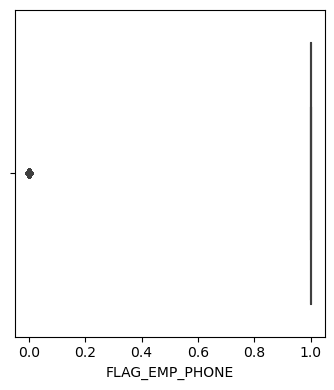

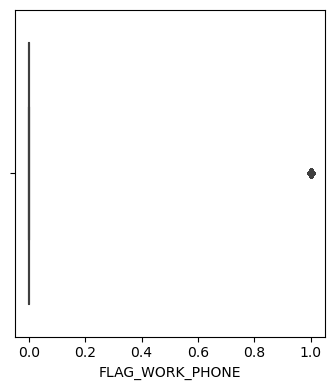

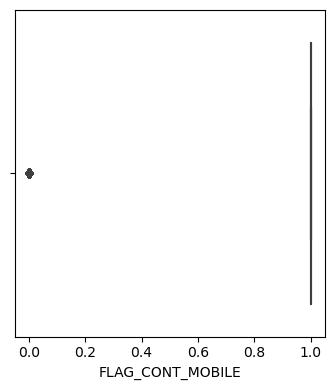

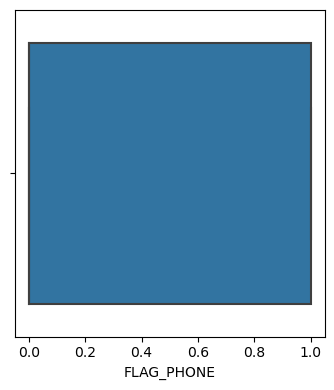

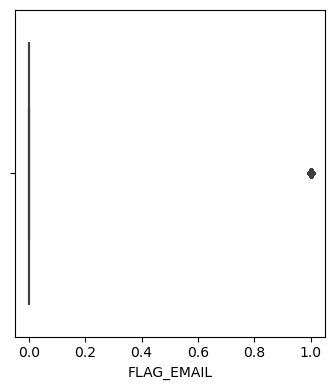

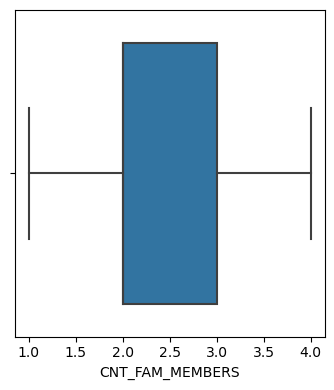

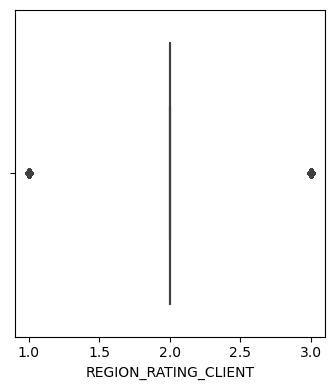

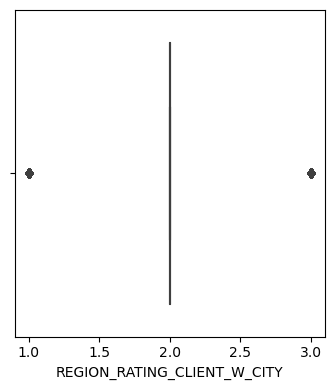

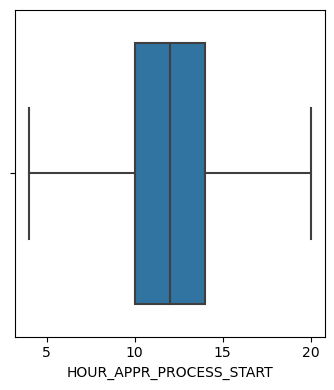

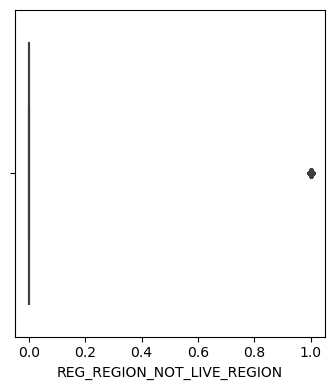

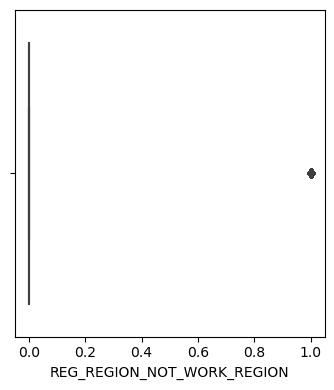

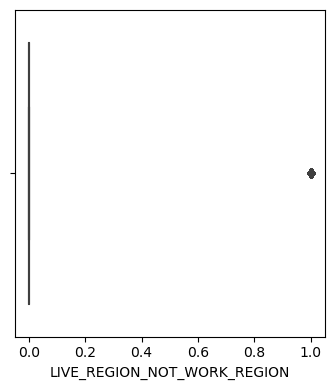

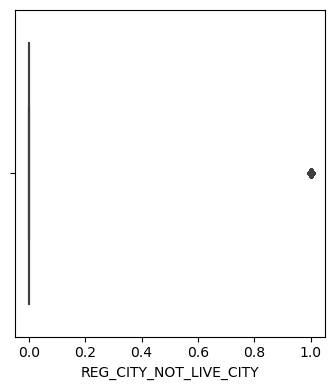

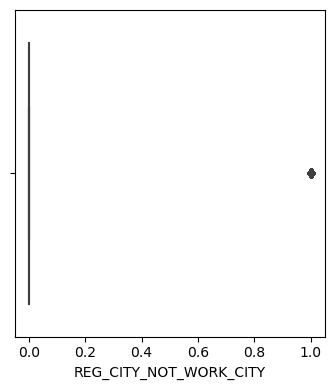

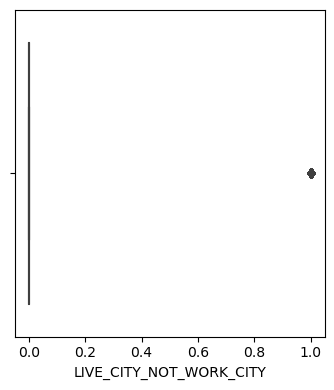

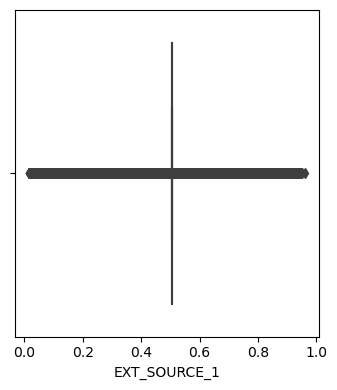

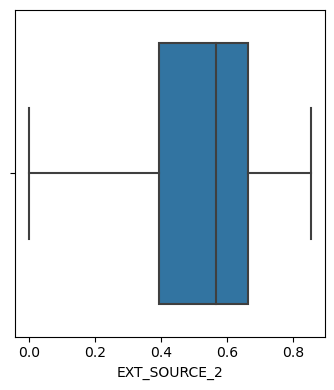

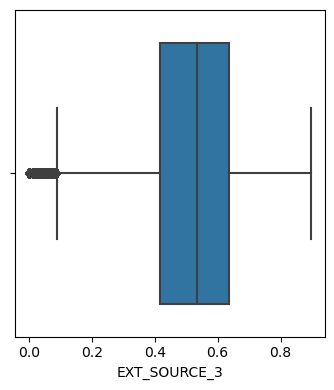

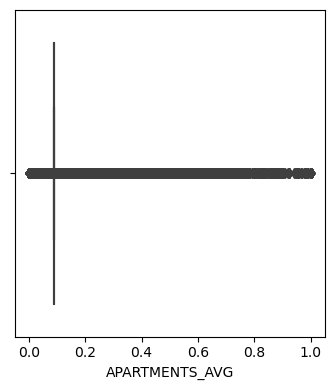

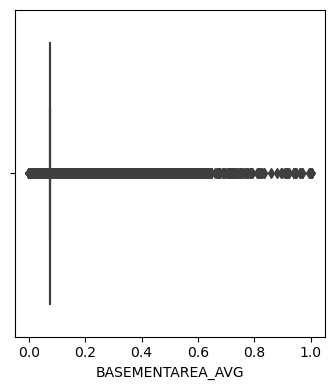

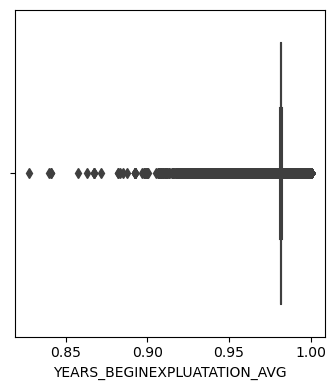

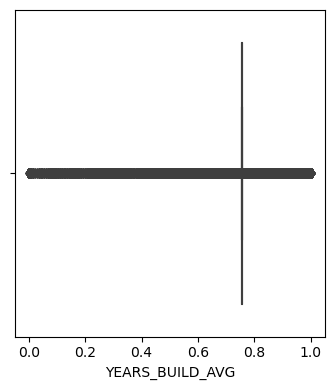

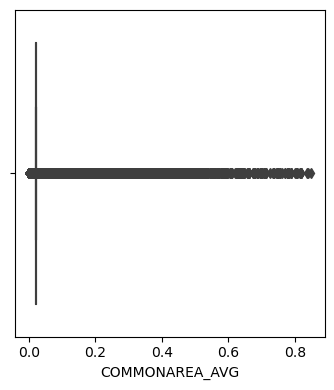

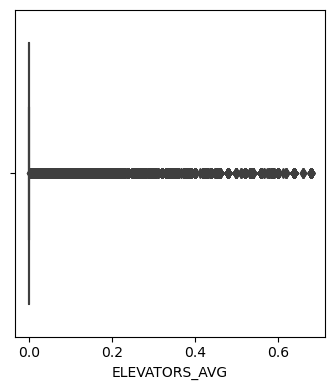

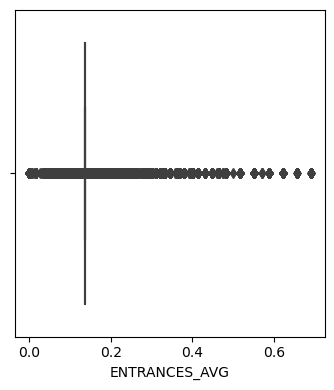

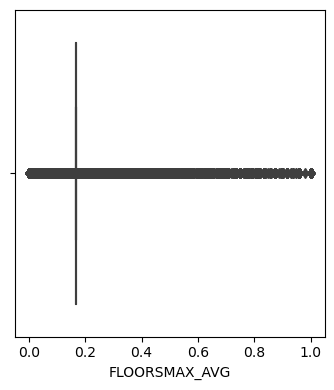

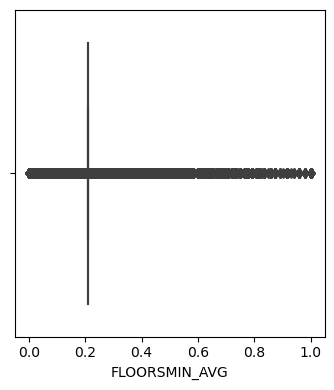

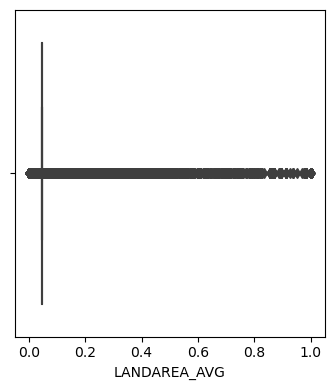

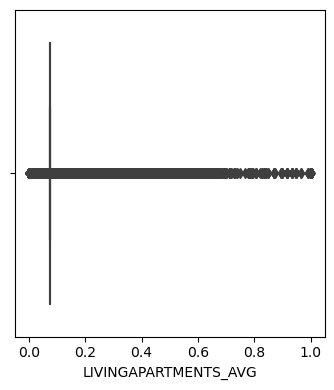

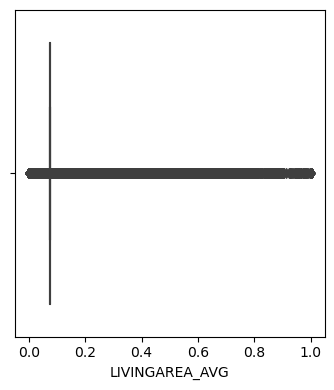

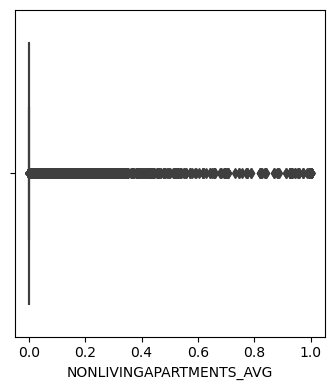

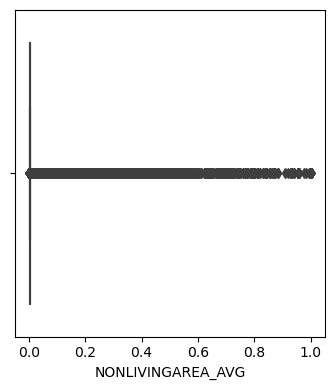

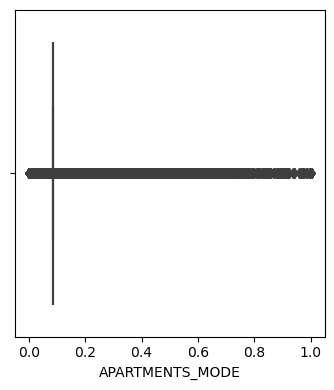

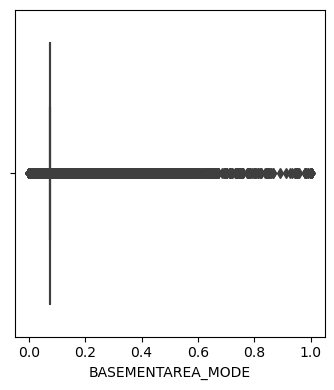

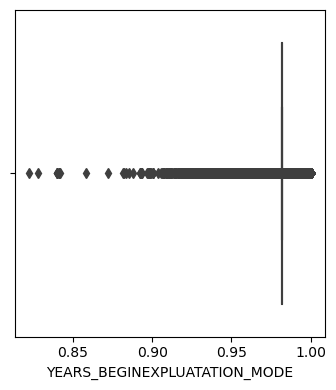

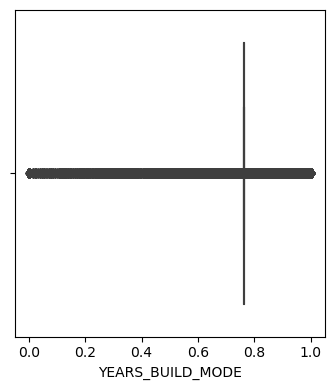

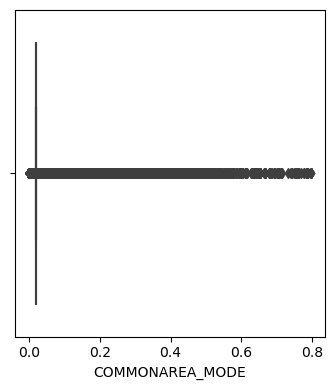

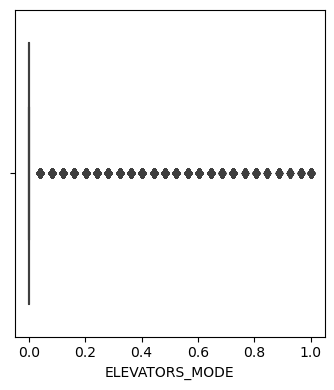

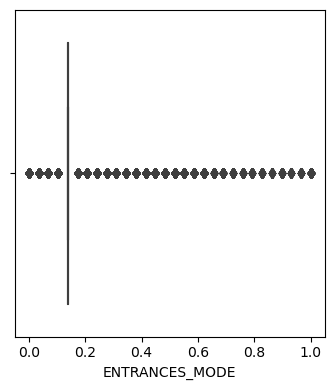

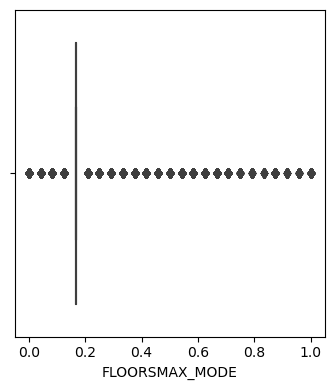

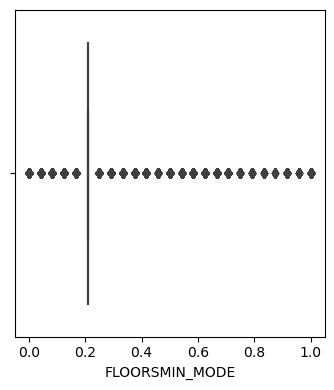

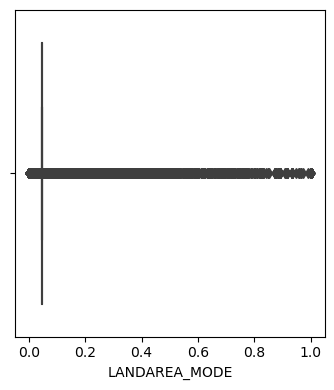

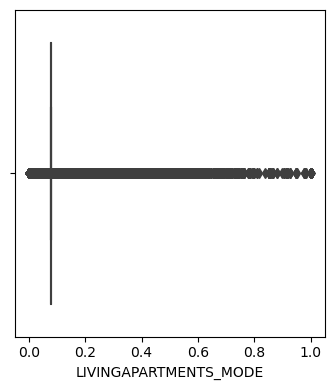

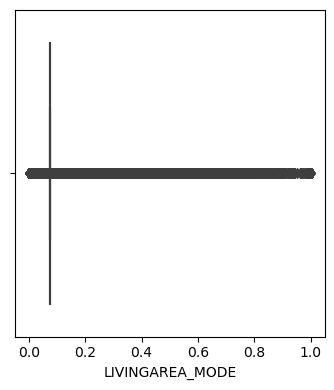

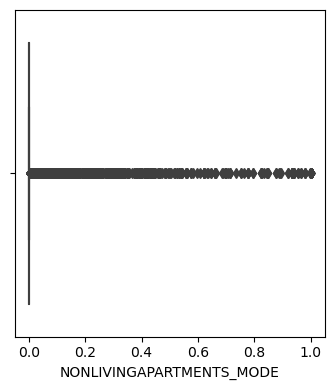

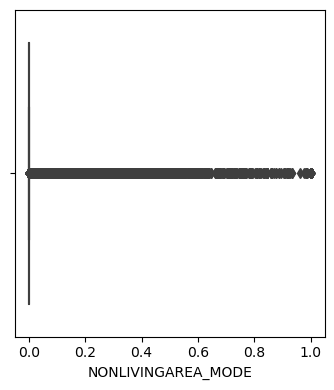

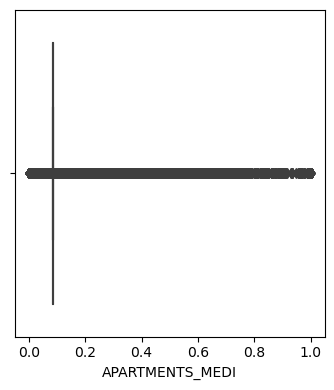

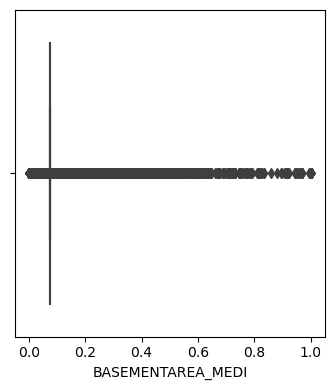

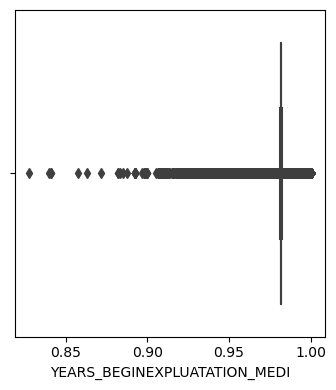

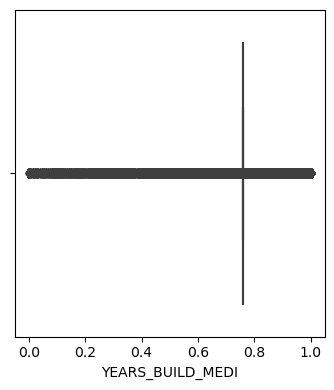

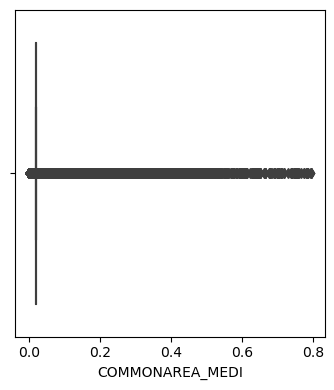

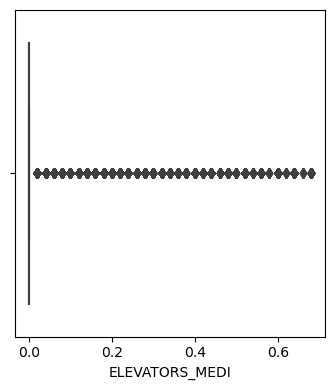

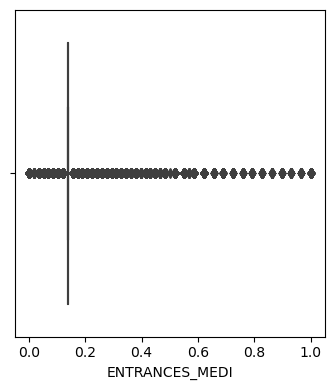

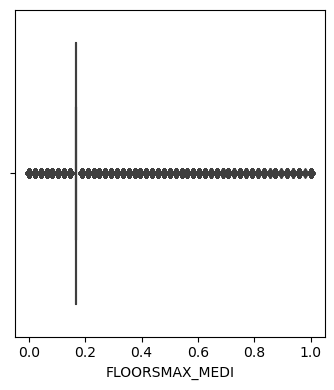

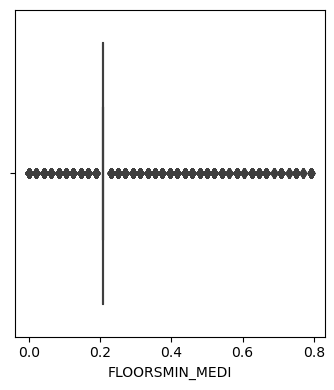

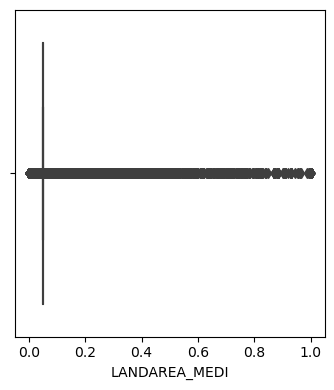

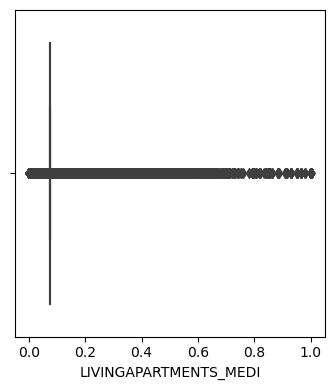

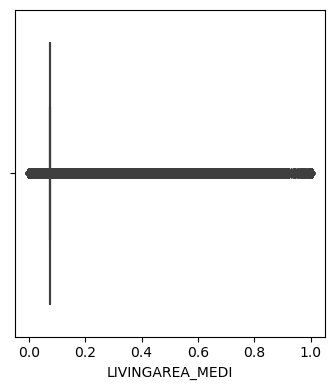

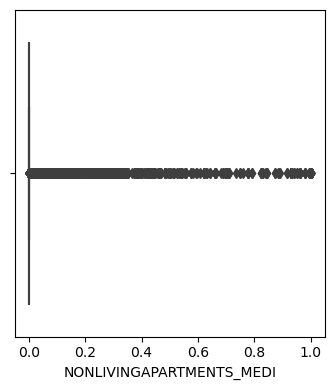

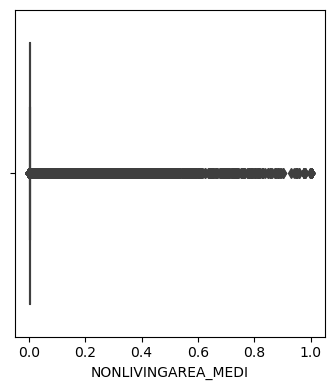

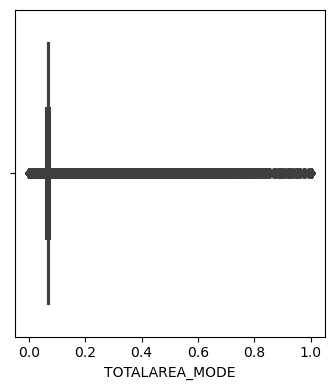

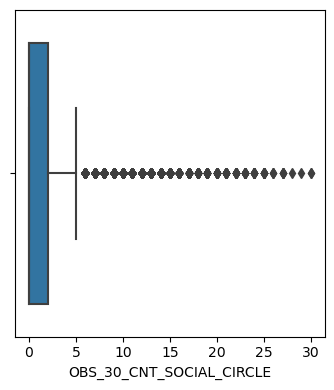

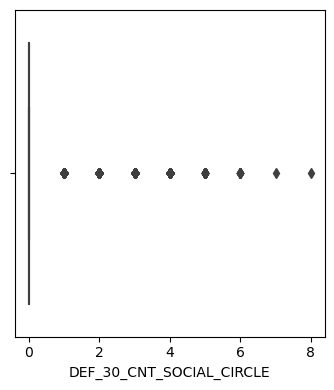

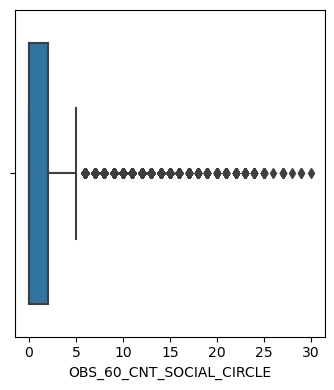

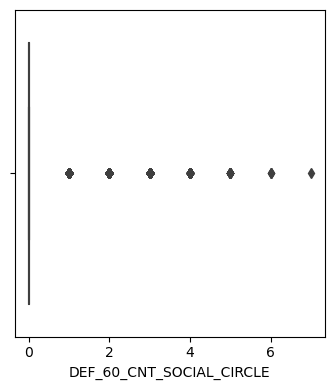

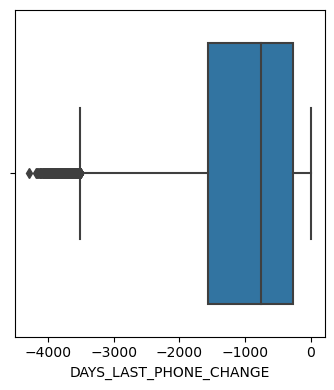

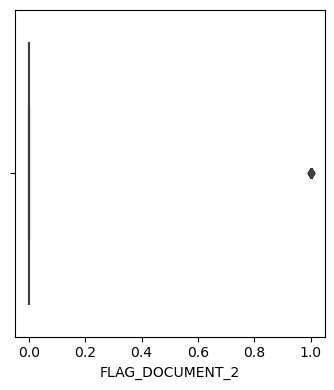

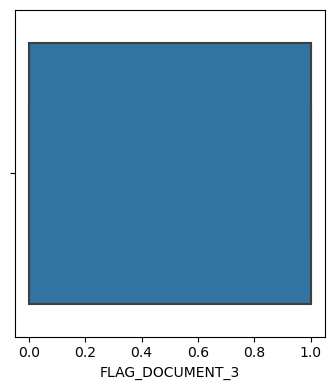

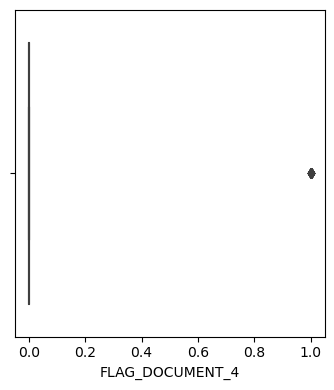

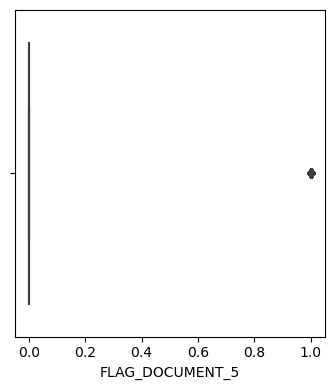

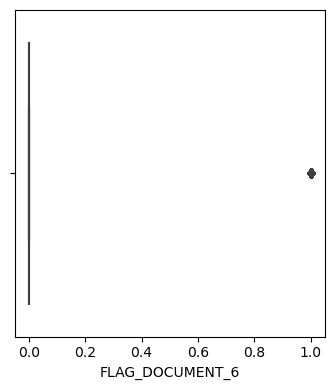

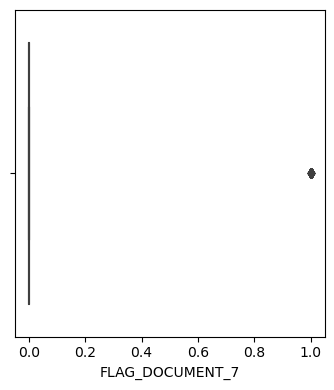

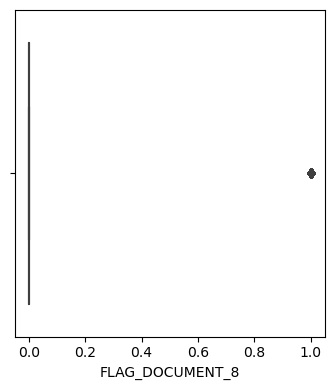

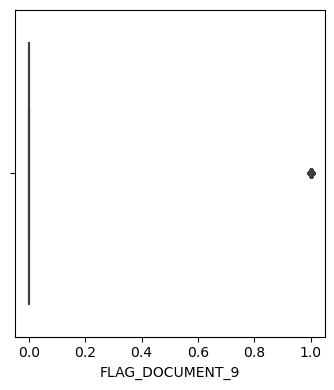

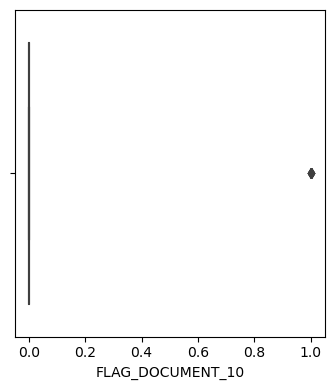

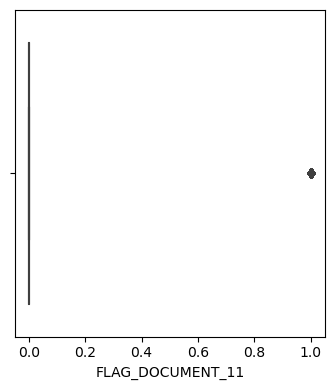

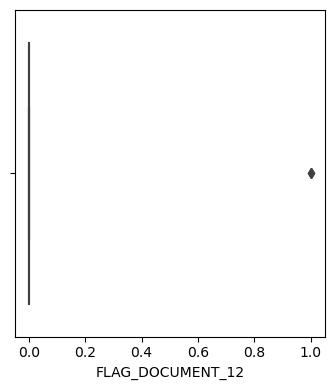

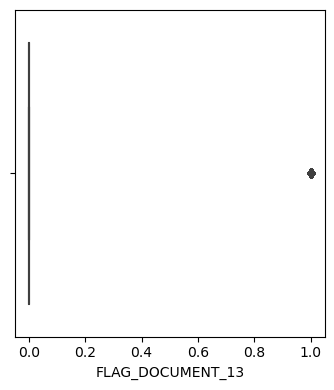

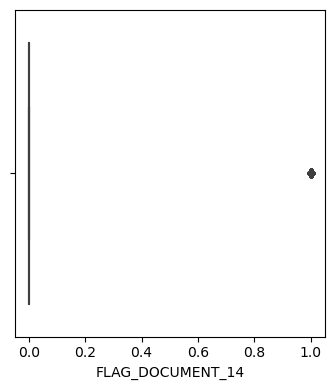

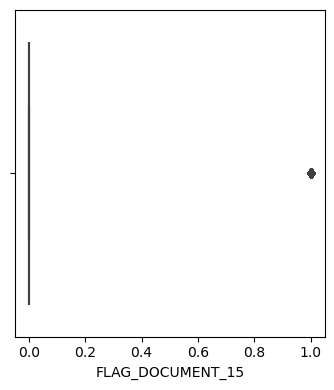

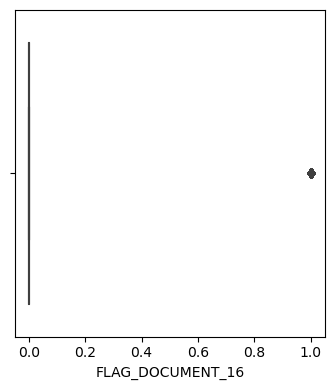

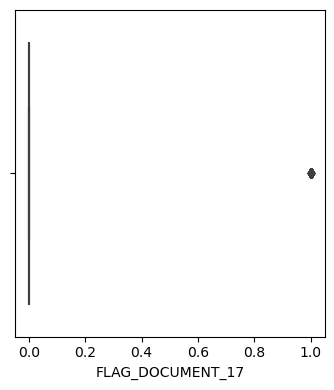

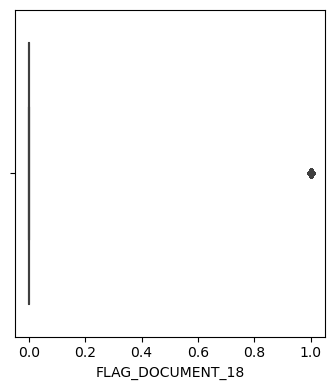

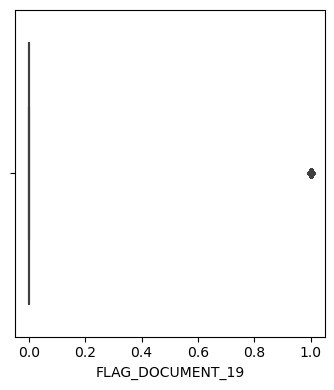

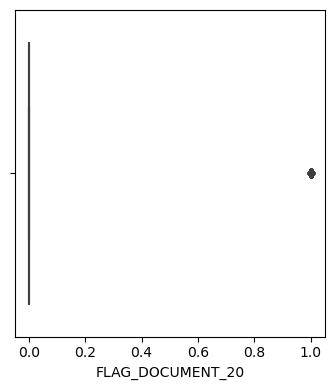

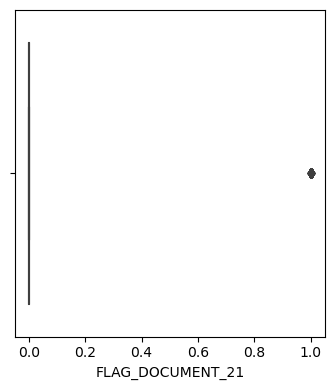

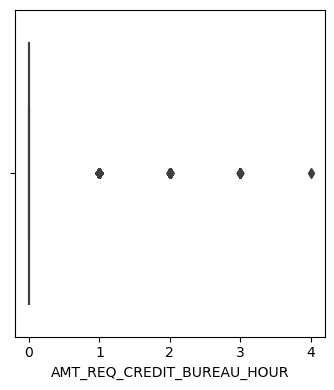

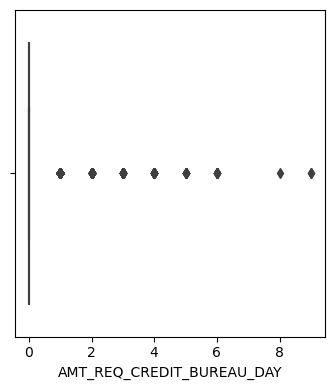

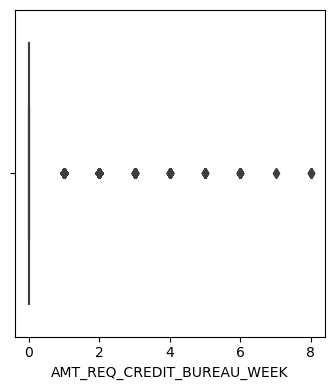

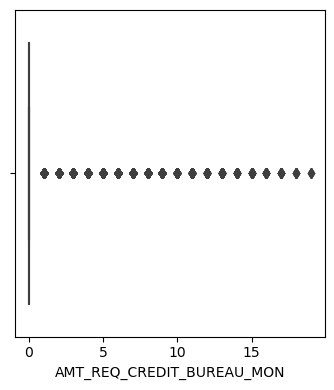

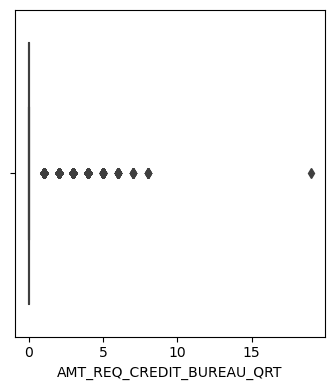

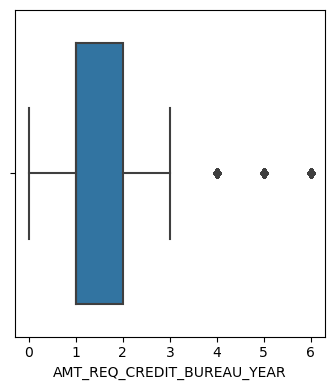

In [34]:
for i in num_col:
    plt.figure(figsize=(10,4))
    plt.subplot(132)
    sns.boxplot(x= data[i])
    plt.xlabel(i)
    plt.tight_layout()
    plt.show()

In [28]:
data.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,1,0,147150.0,513531.0,24700.5,450000.0,6,7,4,3,1,0.018801,25.920548,0.004781,9.994521,5.808219,9.0,1,1,0,1,1,0,8,1.0,2,2,6,10,0,0,0,0,0,0,5,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,2,0,0.0149,5,0,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,0,0,0,0,147150.0,513531.0,35698.5,450000.0,1,4,1,1,1,0.003541,45.931507,0.008917,3.249315,0.797260,9.0,1,1,0,1,1,0,3,2.0,1,1,1,11,0,0,0,0,0,0,39,0.311267,0.622246,0.535276,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,2,0,0.0714,0,0,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
# scaling 

In [30]:
num_col_scale = ['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'YEARS_BIRTH',
 'YEARS_EMPLOYED',
 'YEARS_REGISTRATION',
 'YEARS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[num_col_scale] = scaler.fit_transform(data[num_col_scale])

## Feature Engeneering

In [32]:
# Splitting the data 
x = data.drop(['TARGET','SK_ID_CURR'],axis=1)
y = data['TARGET']

In [33]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [34]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
sel = SelectFromModel(RandomForestClassifier(n_estimators=10,random_state=41))
sel.fit(x_train,y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=10,
                                                 random_state=41))

In [35]:
sel.get_support()

array([False, False, False, False, False, False, False,  True, False,
       False, False, False,  True, False,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False,  True,
        True, False, False,  True,  True, False, False, False, False,
       False, False,  True,  True,  True,  True, False, False,  True,
       False, False, False, False, False, False,  True, False,  True,
       False, False,  True, False,  True, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
        True, False, False, False, False,  True, False, False,  True,
       False,  True, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True])

In [36]:
len(sel.get_support())

120

In [37]:
sel_features = x_train.columns[(sel.get_support())]

In [38]:
len(sel_features)

30

In [39]:
sel_features

Index(['AMT_ANNUITY', 'NAME_FAMILY_STATUS', 'REGION_POPULATION_RELATIVE',
       'YEARS_BIRTH', 'YEARS_EMPLOYED', 'YEARS_REGISTRATION',
       'YEARS_ID_PUBLISH', 'OWN_CAR_AGE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'LANDAREA_AVG', 'LIVINGAREA_AVG',
       'APARTMENTS_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'LANDAREA_MODE',
       'LIVINGAREA_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'LIVINGAREA_MEDI',
       'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

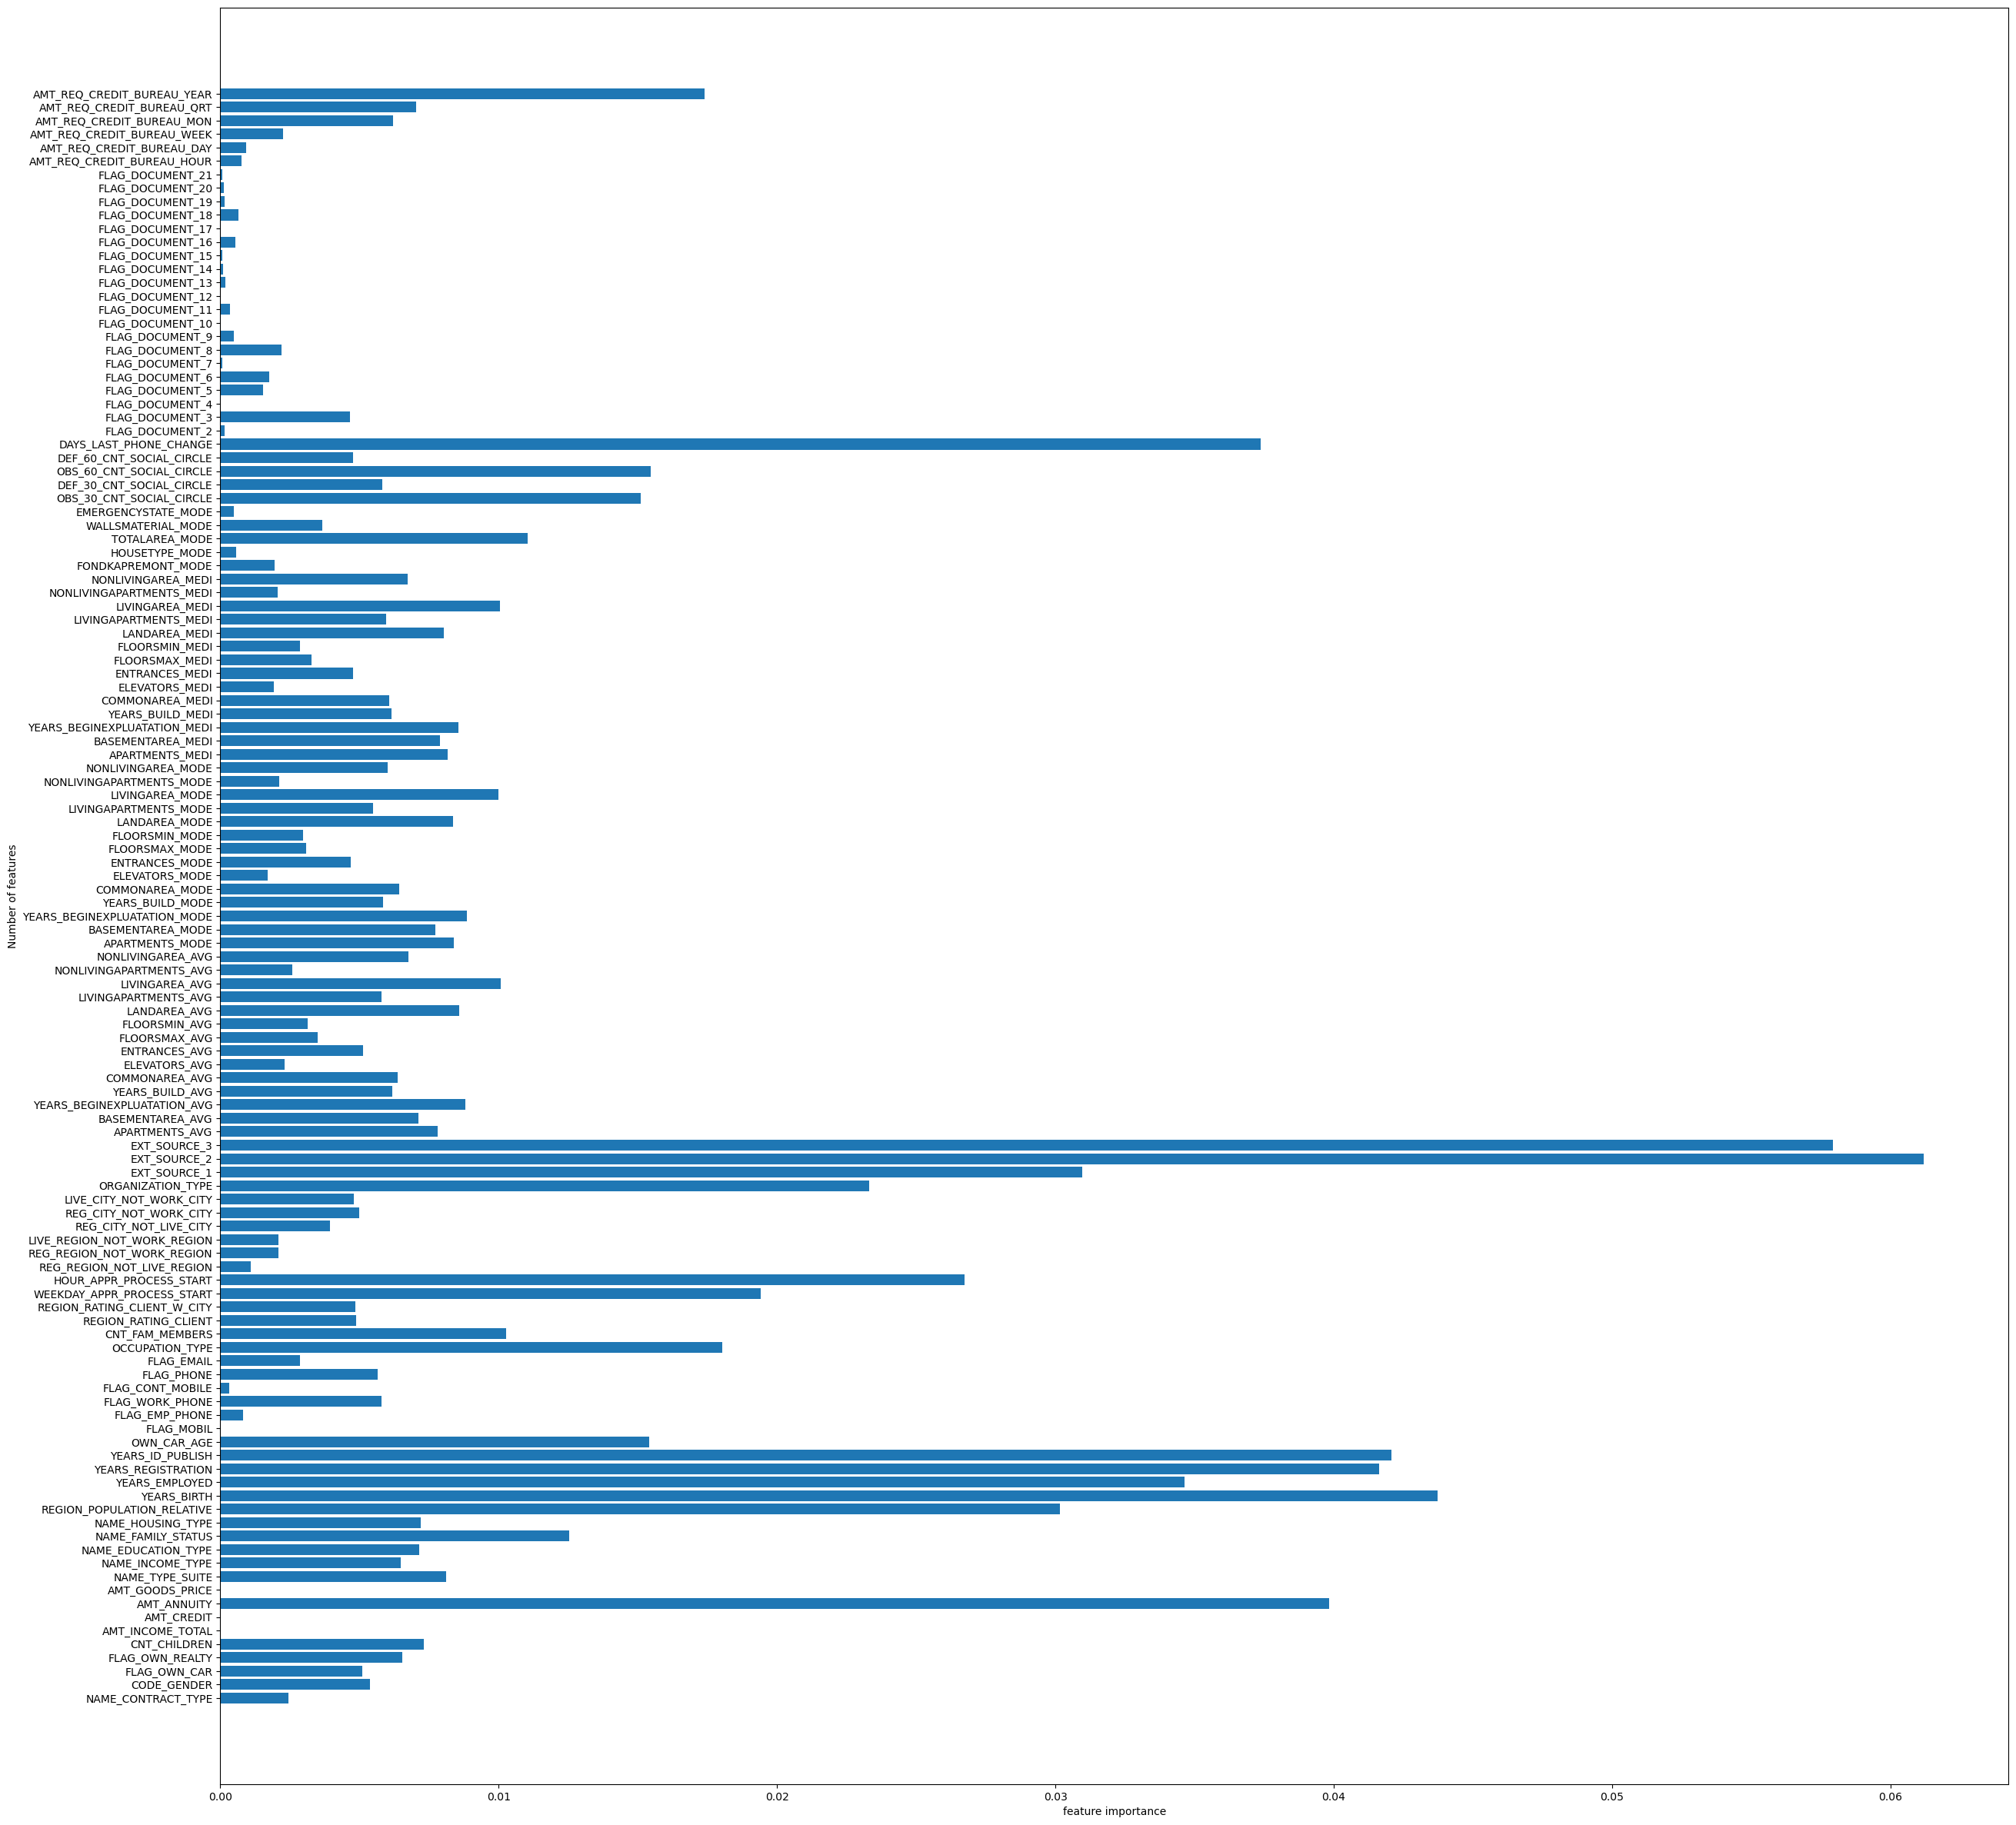

<Figure size 640x480 with 0 Axes>

In [40]:
plt.figure(figsize=(30,30))
plt.barh(x_train.columns,sel.estimator_.feature_importances_)
plt.xlabel("feature importance")
plt.ylabel("Number of features")
plt.show()
plt.tight_layout()

### Insight
After doing feature engering we got 30 most relevant columns.

In [41]:
# data set after feature selection

In [42]:
df = pd.DataFrame(data,columns=sel_features)

In [43]:
df.head()

,AMT_ANNUITY,NAME_FAMILY_STATUS,REGION_POPULATION_RELATIVE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,OWN_CAR_AGE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,LANDAREA_AVG,LIVINGAREA_AVG,APARTMENTS_MODE,YEARS_BEGINEXPLUATATION_MODE,LANDAREA_MODE,LIVINGAREA_MODE,YEARS_BEGINEXPLUATATION_MEDI,LIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_YEAR
0,0.155970,3,0.403026,0.111161,0.000005,0.166674,0.294567,0.157895,8,0.000000,6,0.3750,5,0.072215,0.307542,0.155054,0.838747,0.0369,0.0190,0.0252,0.843645,0.0377,0.0198,0.838747,0.0193,0.0149,0.066667,0.066667,0.735788,0.166667
1,0.230276,1,0.070782,0.522886,0.000009,0.054187,0.040434,0.157895,3,0.333333,1,0.4375,39,0.312933,0.727773,0.597163,0.913573,0.0130,0.0549,0.0924,0.916198,0.0128,0.0554,0.913573,0.0558,0.0714,0.033333,0.033333,0.807083,0.000000
2,0.034690,3,0.212105,0.651466,0.000002,0.194636,0.351674,0.456140,8,0.000000,1,0.3125,11,0.518318,0.650190,0.814130,0.893271,0.0481,0.0745,0.0840,0.896513,0.0458,0.0731,0.893271,0.0749,0.0688,0.000000,0.000000,0.810112,0.000000
3,0.189657,0,0.168278,0.649154,0.000023,0.449262,0.338613,0.157895,8,0.333333,6,0.8125,5,0.518318,0.760751,0.597163,0.893271,0.0481,0.0745,0.0840,0.896513,0.0458,0.0731,0.893271,0.0749,0.0688,0.066667,0.066667,0.856244,0.166667
4,0.136816,3,0.617744,0.701409,0.000023,0.196966,0.480478,0.157895,3,0.000000,4,0.4375,37,0.518318,0.377472,0.597163,0.893271,0.0481,0.0745,0.0840,0.896513,0.0458,0.0731,0.893271,0.0749,0.0688,0.000000,0.000000,0.742311,0.000000


In [44]:
final_data = pd.concat([data['TARGET'],df],axis=1)

In [45]:
final_data.head()

,TARGET,AMT_ANNUITY,NAME_FAMILY_STATUS,REGION_POPULATION_RELATIVE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,OWN_CAR_AGE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,LANDAREA_AVG,LIVINGAREA_AVG,APARTMENTS_MODE,YEARS_BEGINEXPLUATATION_MODE,LANDAREA_MODE,LIVINGAREA_MODE,YEARS_BEGINEXPLUATATION_MEDI,LIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,0.155970,3,0.403026,0.111161,0.000005,0.166674,0.294567,0.157895,8,0.000000,6,0.3750,5,0.072215,0.307542,0.155054,0.838747,0.0369,0.0190,0.0252,0.843645,0.0377,0.0198,0.838747,0.0193,0.0149,0.066667,0.066667,0.735788,0.166667
1,0,0.230276,1,0.070782,0.522886,0.000009,0.054187,0.040434,0.157895,3,0.333333,1,0.4375,39,0.312933,0.727773,0.597163,0.913573,0.0130,0.0549,0.0924,0.916198,0.0128,0.0554,0.913573,0.0558,0.0714,0.033333,0.033333,0.807083,0.000000
2,0,0.034690,3,0.212105,0.651466,0.000002,0.194636,0.351674,0.456140,8,0.000000,1,0.3125,11,0.518318,0.650190,0.814130,0.893271,0.0481,0.0745,0.0840,0.896513,0.0458,0.0731,0.893271,0.0749,0.0688,0.000000,0.000000,0.810112,0.000000
3,0,0.189657,0,0.168278,0.649154,0.000023,0.449262,0.338613,0.157895,8,0.333333,6,0.8125,5,0.518318,0.760751,0.597163,0.893271,0.0481,0.0745,0.0840,0.896513,0.0458,0.0731,0.893271,0.0749,0.0688,0.066667,0.066667,0.856244,0.166667
4,0,0.136816,3,0.617744,0.701409,0.000023,0.196966,0.480478,0.157895,3,0.000000,4,0.4375,37,0.518318,0.377472,0.597163,0.893271,0.0481,0.0745,0.0840,0.896513,0.0458,0.0731,0.893271,0.0749,0.0688,0.000000,0.000000,0.742311,0.000000


In [46]:
final_data.shape

(307511, 31)

In [47]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 31 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   TARGET                        307511 non-null  int64  
 1   AMT_ANNUITY                   307511 non-null  float64
 2   NAME_FAMILY_STATUS            307511 non-null  int32  
 3   REGION_POPULATION_RELATIVE    307511 non-null  float64
 4   YEARS_BIRTH                   307511 non-null  float64
 5   YEARS_EMPLOYED                307511 non-null  float64
 6   YEARS_REGISTRATION            307511 non-null  float64
 7   YEARS_ID_PUBLISH              307511 non-null  float64
 8   OWN_CAR_AGE                   307511 non-null  float64
 9   OCCUPATION_TYPE               307511 non-null  int32  
 10  CNT_FAM_MEMBERS               307511 non-null  float64
 11  WEEKDAY_APPR_PROCESS_START    307511 non-null  int32  
 12  HOUR_APPR_PROCESS_START       307511 non-nul

## Correlation

In [48]:
# Checkiing Correlation
plt.figure(figsize=(100,100))
sns.heatmap(final_data.corr())

<Axes: >

## Insight
There are few fetures that are highly correlated.

## Balancing

In [49]:
X = final_data.drop('TARGET',axis=1)
Y = final_data['TARGET']

In [50]:
import imblearn

In [51]:
# Balancing the data by Under sampling
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

desired_class_ration = 2

# Calculate the desired number of samples for the minority class
minority_class_count = Counter(y)[1]
desired_minority_class_count = int(desired_class_ration * minority_class_count)

# Create RandomUnderSampler instance with specified sampling strategy
rus = RandomUnderSampler(sampling_strategy={1: minority_class_count,0: desired_minority_class_count})

# perform undersampling 
x_rus, y_rus = rus.fit_resample(x,y)

In [52]:
from collections import Counter

In [53]:
Counter(Y)

Counter({1: 24825, 0: 282686})

In [54]:
Counter(y_rus)

Counter({0: 49650, 1: 24825})

## Splitting the daata

In [55]:
# Splitting the data for training and testing 
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x_rus,y_rus,test_size=0.20,random_state=30)

# Logistic Regression

## Model Creation

In [56]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model_lr = lr.fit(X_train,Y_train)
model_lr

LogisticRegression()

In [57]:
y_pred_lr = lr.predict(X_test)
y_pred_lr

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [58]:
# Evaluation

In [59]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report

In [60]:
print(classification_report(Y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.74      0.88      0.81     10015
           1       0.60      0.36      0.45      4880

    accuracy                           0.71     14895
   macro avg       0.67      0.62      0.63     14895
weighted avg       0.70      0.71      0.69     14895



In [61]:
y_pred_train = lr.predict(X_train)


In [62]:
print(classification_report(Y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.74      0.89      0.81     39635
           1       0.63      0.37      0.47     19945

    accuracy                           0.72     59580
   macro avg       0.68      0.63      0.64     59580
weighted avg       0.70      0.72      0.69     59580



## KNN 

In [63]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=4)
model_KNN = KNN.fit(X_train,Y_train)
model_KNN

KNeighborsClassifier(n_neighbors=4)

In [64]:
y_pred_KNN = model_KNN.predict(X_test)

## Evaluation 

In [65]:
print(classification_report(Y_test,y_pred_KNN))

              precision    recall  f1-score   support

           0       0.69      0.89      0.78     10015
           1       0.42      0.16      0.23      4880

    accuracy                           0.65     14895
   macro avg       0.55      0.53      0.50     14895
weighted avg       0.60      0.65      0.60     14895



## SVM

In [66]:
from sklearn.svm import SVC
svc = SVC()
model_svc = svc.fit(X_train,Y_train)
model_svc

KeyboardInterrupt: 

In [79]:
y_pred_SVC = model_svc.predict(x_test)

### Evaluation

In [ ]:
print(classification_report(y_train,y_pred_SVC))

# Decession Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
model_DTC = DTC.fit(X_train,Y_train)
model_DTC

In [71]:
y_pred_DTC = DTC.predict(X_test)

### Evaluation

In [73]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report

In [74]:
print(classification_report(Y_test,y_pred_DTC))

              precision    recall  f1-score   support

           0       0.72      0.71      0.72     10015
           1       0.43      0.44      0.44      4880

    accuracy                           0.62     14895
   macro avg       0.58      0.58      0.58     14895
weighted avg       0.63      0.62      0.63     14895



## Hyperparameter tunning

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
param_grid = {'criterion' : ['gini','entropy'],
              'splitter' : ['best','random'],
              'min_samples_leaf' : [2,5,8,10,15],
             'min_samples_split' : [3,7,9,13],
             'max_depth' : [2,4,7,6]}

In [ ]:
dtr = DecisionTreeClassifier(random_state=34)
grid_cv = GridSearchCV(dtr,param_grid,scoring='f1',verbose=3,cv =4,n_jobs=-1)
grid_cv.fit(X_train,Y_train)
best_params = grid_cv.best_params_
print('best_parameters')
print(best_params)

In [ ]:
model_dtr_ht = DecisionTreeClassifier(criterion = 'gini', max_depth= 7, min_samples_leaf= 2, min_samples_split= 3, splitter= 'best')
model_dtr_ht.fit(X_train,Y_train)

In [ ]:
y_pred_dtr_ht = model_dtr_ht.predict(X_test)

## Evaluation

In [ ]:
print(classification_report(Y_test,y_pred_dtr_ht))

## RandomForest 

In [86]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
model_RFC = RFC.fit(X_train,Y_train)
model_RFC

RandomForestClassifier()

In [87]:
y_pred_RFC = model_RFC.predict(X_test)

## Evaluation

In [88]:
print(classification_report(Y_test,y_pred_RFC))

              precision    recall  f1-score   support

           0       0.74      0.91      0.81     10015
           1       0.63      0.33      0.44      4880

    accuracy                           0.72     14895
   macro avg       0.68      0.62      0.62     14895
weighted avg       0.70      0.72      0.69     14895



# hyperparameter tunning

In [77]:
from sklearn.model_selection import RandomizedSearchCV

In [78]:
n_estimators = [200,250,270,310,350,390]
max_features = ['log2','sqrt']
max_depth = [10,20,30,40,50]
min_samples_split = [2,5,7,9,14]
min_samples_leaf = [2,5,6,8,10]
bootstrap = [True,False]

In [79]:
random_grid = {'n_estimators':n_estimators,'max_features':max_features,
                              'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf
                              ,'bootstrap' :bootstrap,'max_depth' : max_depth}


In [77]:
model_rfr_ht = RandomForestClassifier(n_estimators = 50, min_samples_split = 14, min_samples_leaf = 5, max_features= 'sqrt', max_depth = 37, bootstrap= False)
model_rfr_ht.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=False, max_depth=37, min_samples_leaf=5,
                       min_samples_split=14, n_estimators=50)

In [78]:
y_pred_rfr_ht = model_rfr_ht.predict(X_test)

## evaluation

In [79]:
print(classification_report(Y_test,y_pred_rfr_ht))

              precision    recall  f1-score   support

           0       0.74      0.91      0.81     10015
           1       0.64      0.34      0.44      4880

    accuracy                           0.72     14895
   macro avg       0.69      0.62      0.63     14895
weighted avg       0.71      0.72      0.69     14895

